<a href="hhttps://colab.research.google.com/drive/1ulsLQbdIP0srkgfQi0pf2-oCL0izNNgp#scrollTo=m6ferLqJqkx4/mlProject_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='red'  size=7>Prediction of Diabetes Using Machine Learning
</font>

## Importing Libraries :

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
import missingno as msno

from collections import Counter
#from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score,roc_curve
#from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor





In [ ]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Loading the Data :

In [ ]:
data = pd.read_csv('diabetes.csv')
display(data.head())

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

In [ ]:
print("number of samples : ",len(data))

number of samples :  2000


In [ ]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     182
BMI                         247
DiabetesPedigreeFunction    505
Age                          52
Outcome                       2
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
data.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.375000                  0.244000    24.000000     0.000000  
50%      32.300000                  0.376000    29.000000     0.000000  
75%      36.800000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

In [ ]:
data.Outcome.unique()


array([1, 0])

In [ ]:
data["Outcome"].value_counts()


0    1316
1     684
Name: Outcome, dtype: int64

## Data Visualization :

In [ ]:
feature_cols = data.drop('Outcome', axis=1).columns.to_list()
print(feature_cols)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


<Axes: xlabel='Outcome', ylabel='Age'>

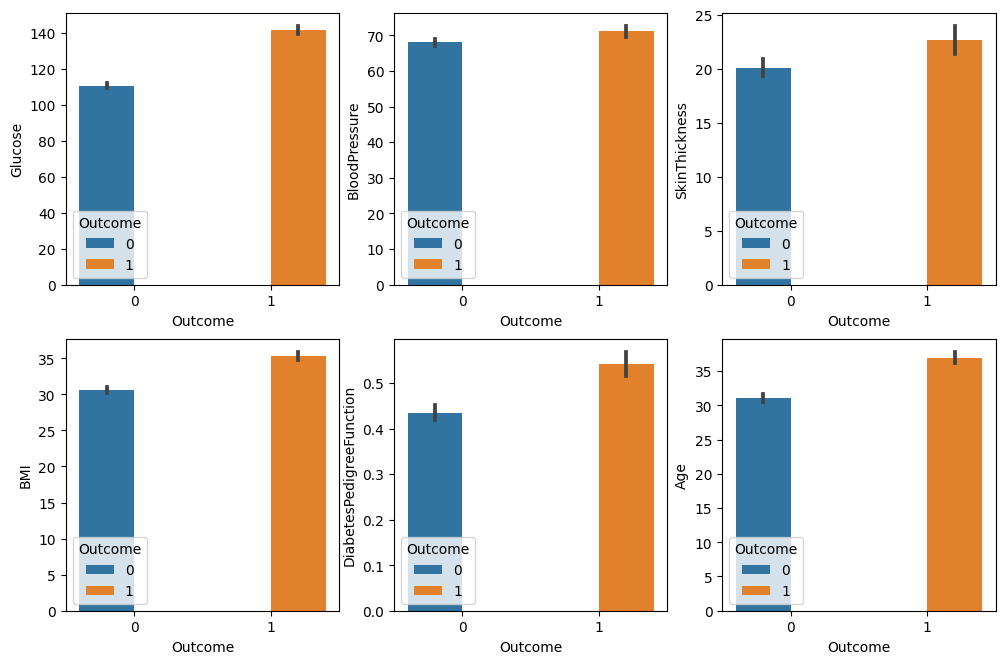

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.barplot(x='Outcome',y='Glucose',data=data,hue="Outcome")
plt.subplot(3,3,2)
sns.barplot(x='Outcome',y='BloodPressure',data=data,hue="Outcome")
plt.subplot(3,3,3)
sns.barplot(x='Outcome',y='SkinThickness',data=data,hue="Outcome")
plt.subplot(3,3,4)
sns.barplot(x='Outcome',y='BMI',data=data,hue="Outcome")
plt.subplot(3,3,5)
sns.barplot(x='Outcome',y='DiabetesPedigreeFunction',data=data,hue="Outcome")
plt.subplot(3,3,6)
sns.barplot(x='Outcome',y='Age',data=data,hue="Outcome")

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

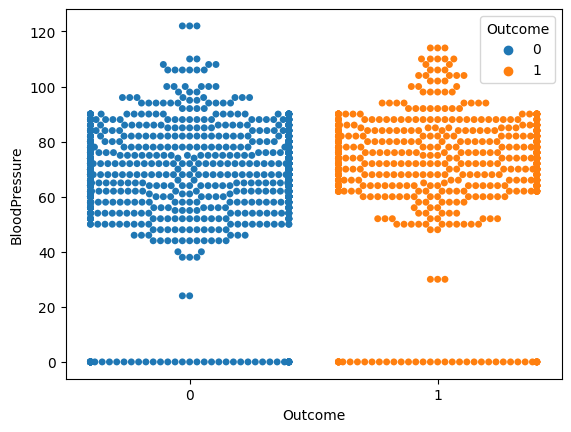

In [ ]:
sns.swarmplot(x='Outcome',y='BloodPressure',data=data,hue='Outcome')

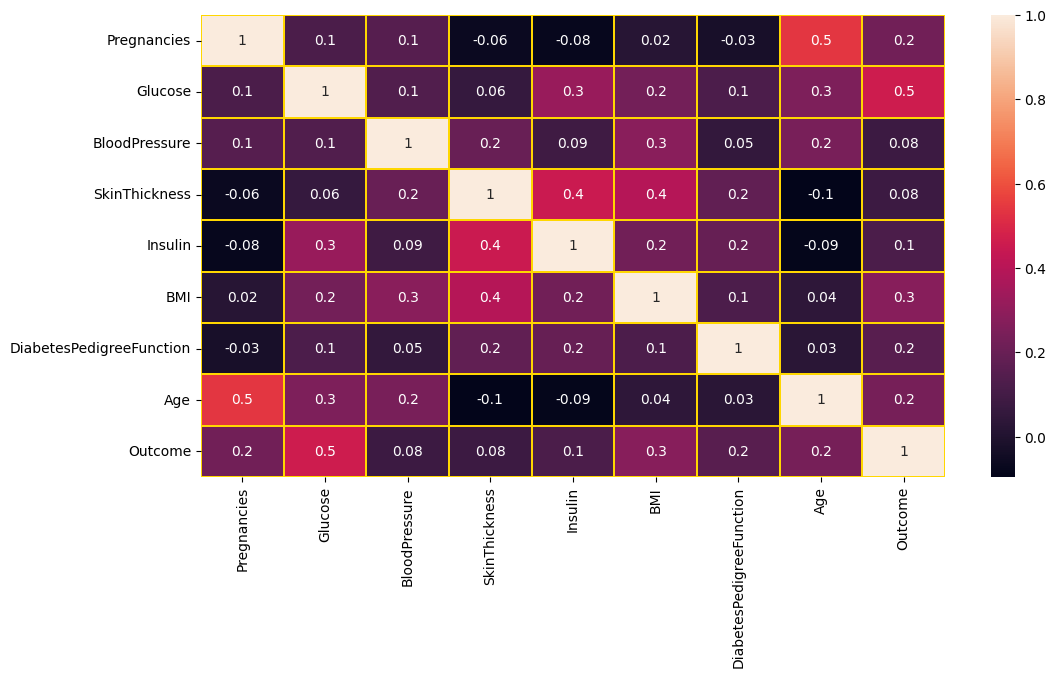

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(data.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor = 'gold', annot=True,);

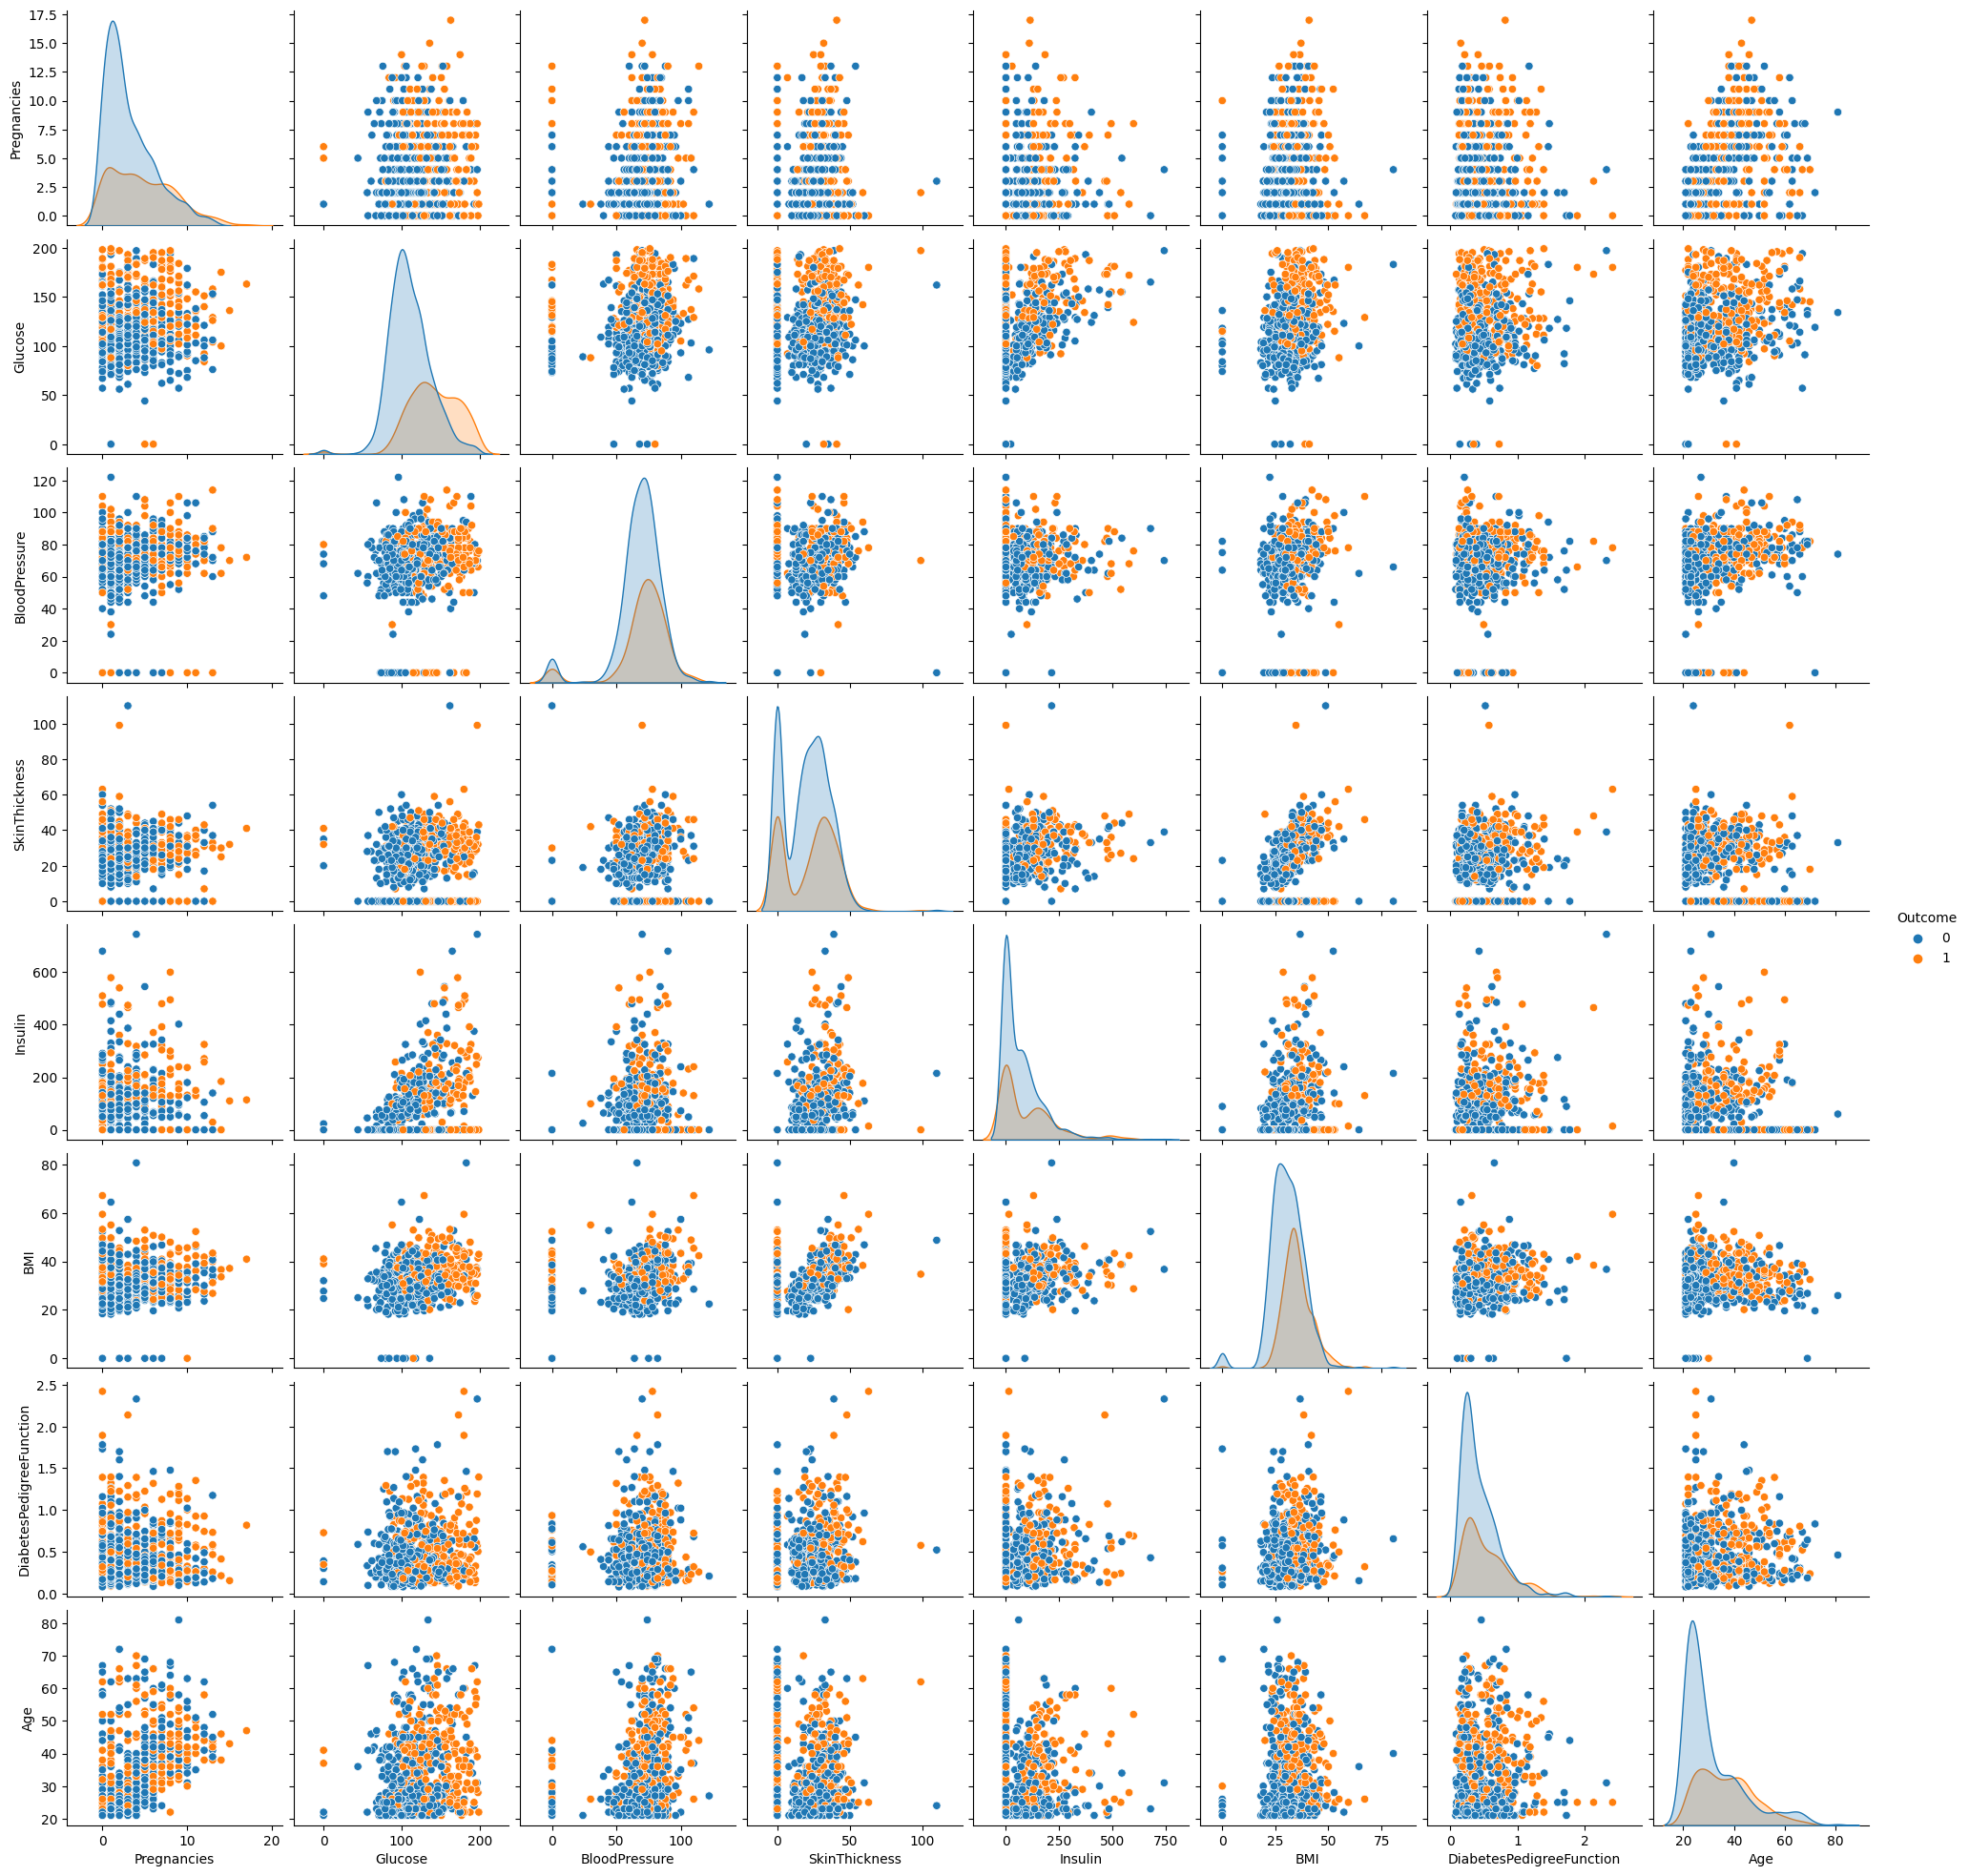

In [ ]:
sns.pairplot(data,hue='Outcome')

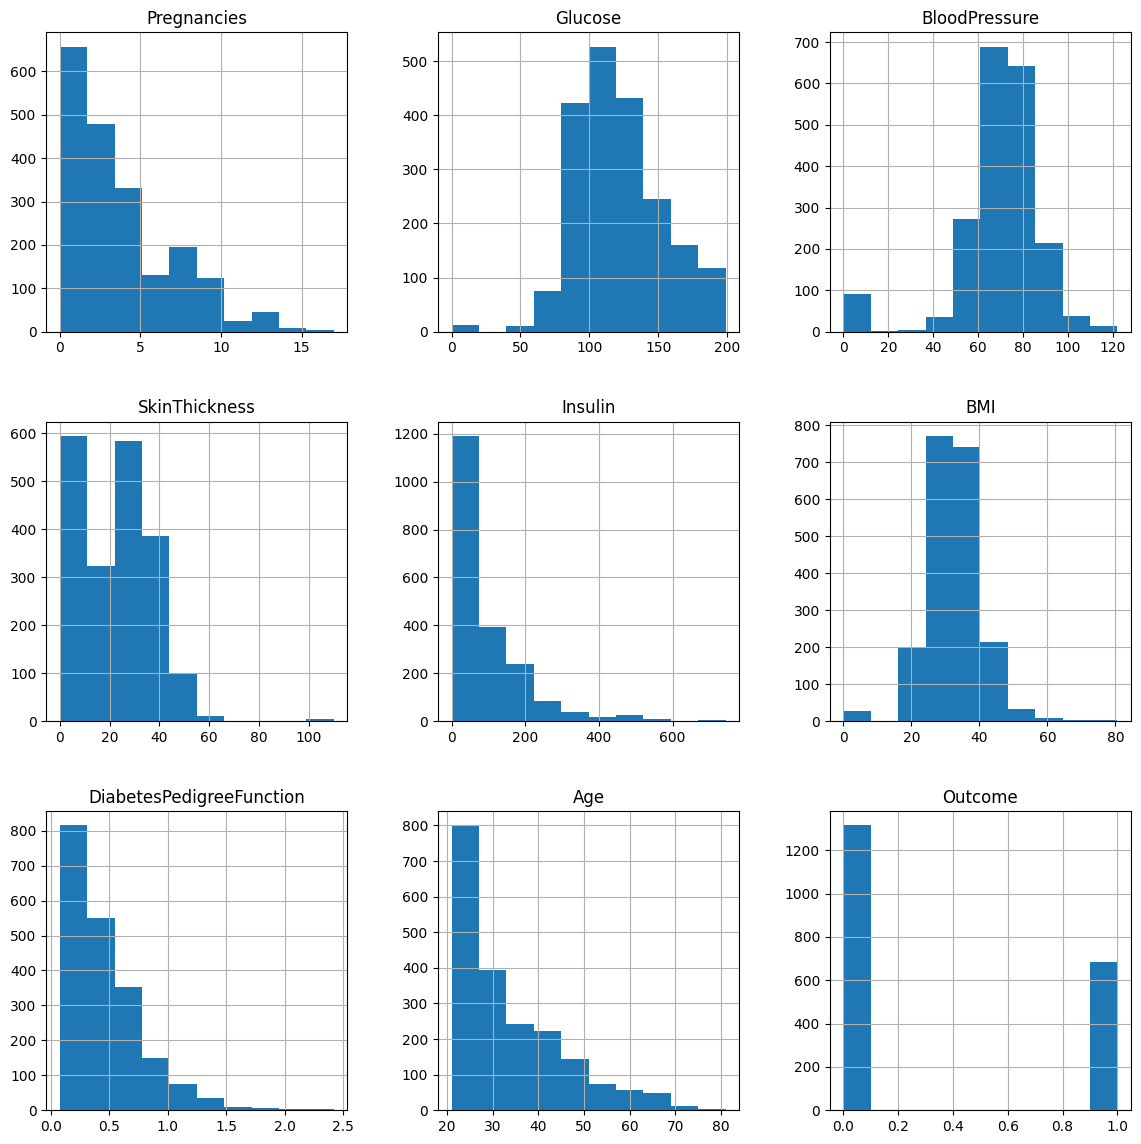

In [ ]:
numbers = pd.Series(data.columns)
data[numbers].hist(figsize = (14, 14))
plt.show()

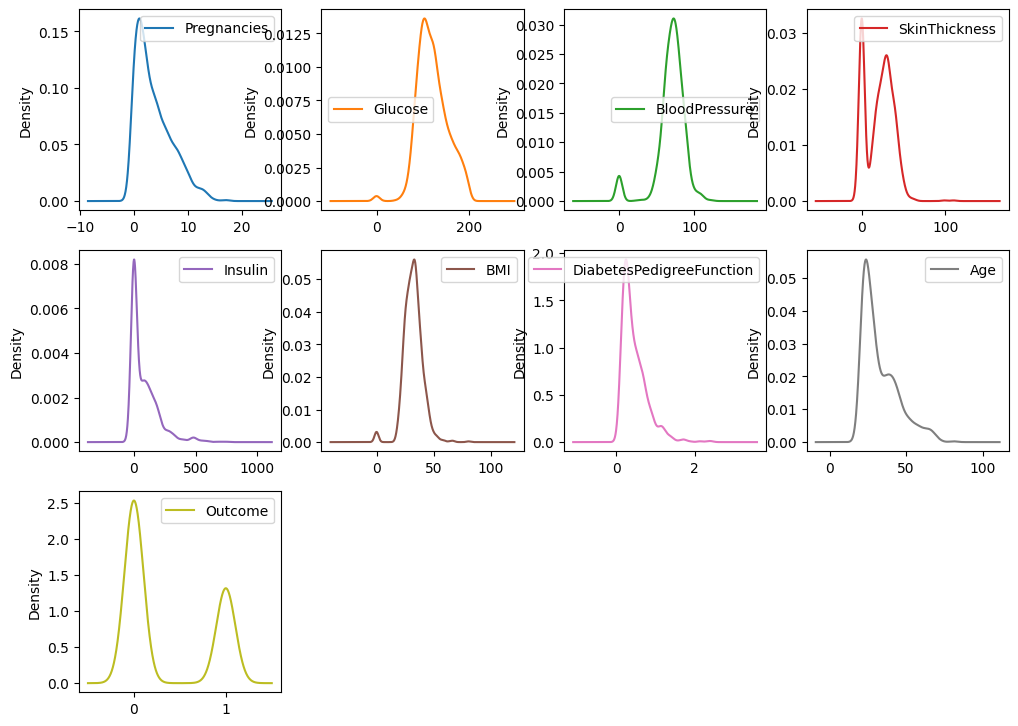

In [ ]:
data.plot(kind = 'density', subplots= True, layout = (4,4), sharex =False, figsize = (12, 12));

<Axes: xlabel='Outcome', ylabel='count'>

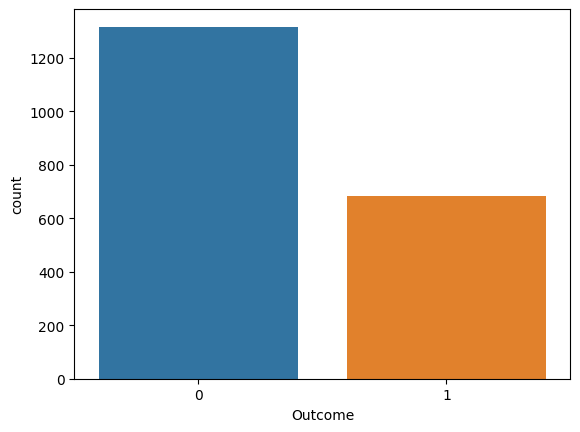

In [ ]:
sns.countplot(x="Outcome",data=data)

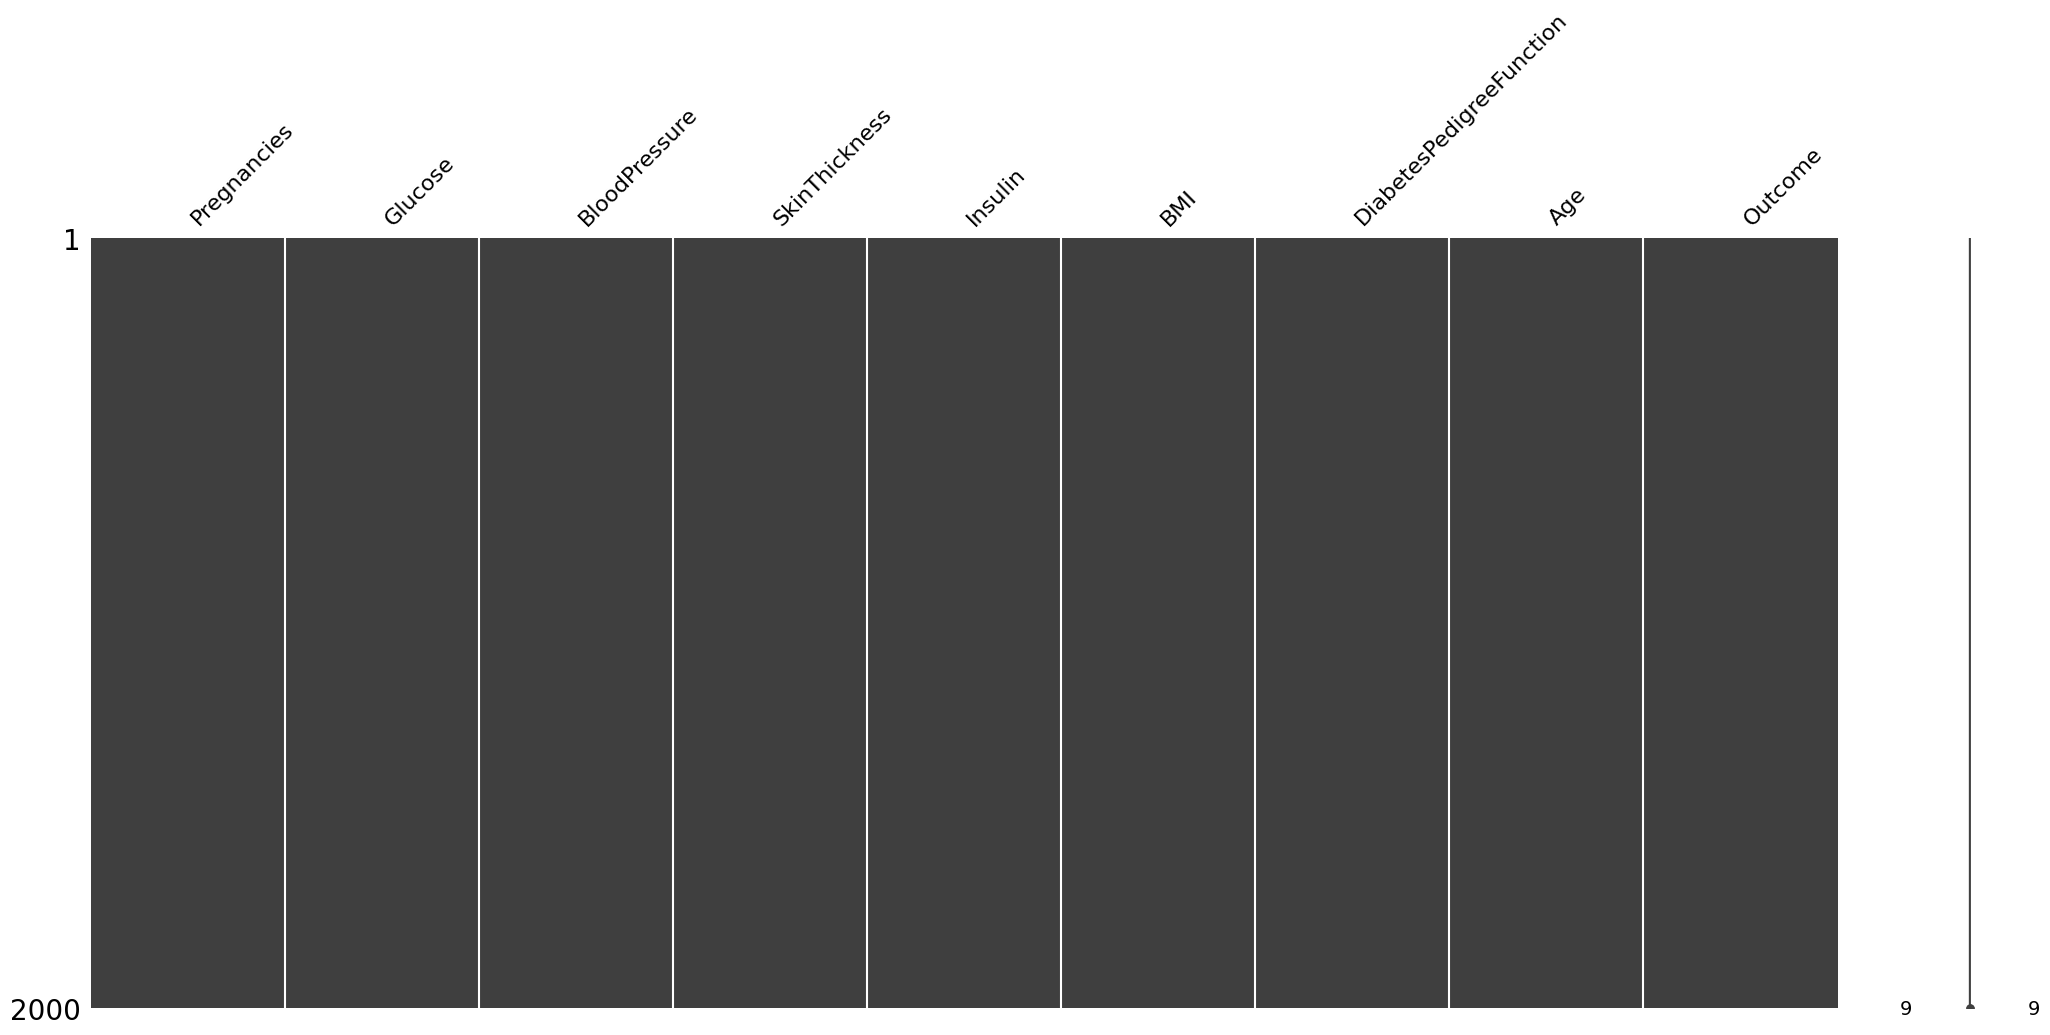

In [ ]:
msno.matrix(data)
plt.show()

## Data Preprocessing :

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
display(data.head(10))

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   
5            0      173             78             32      265  46.5   
6            4       99             72             17        0  25.6   
7            8      194             80              0        0  26.1   
8            2       83             65             28       66  36.8   
9            2       89             90             30        0  33.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0  
5                     1.159   58        0  
6                     0.294   28        0  
7                     0.551   67        0  
8                     0.629   24        0  
9                     0.292   42        0

In [ ]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
display(data.head(10))

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2    138.0           62.0           35.0      NaN  33.6   
1            0     84.0           82.0           31.0    125.0  38.2   
2            0    145.0            NaN            NaN      NaN  44.2   
3            0    135.0           68.0           42.0    250.0  42.3   
4            1    139.0           62.0           41.0    480.0  40.7   
5            0    173.0           78.0           32.0    265.0  46.5   
6            4     99.0           72.0           17.0      NaN  25.6   
7            8    194.0           80.0            NaN      NaN  26.1   
8            2     83.0           65.0           28.0     66.0  36.8   
9            2     89.0           90.0           30.0      NaN  33.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0  
5                     1.159   58        0  
6                     0.294   28        0  
7                     0.551   67        0  
8                     0.629   24        0  
9                     0.292   42        0

In [ ]:
data.isnull().sum()


Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

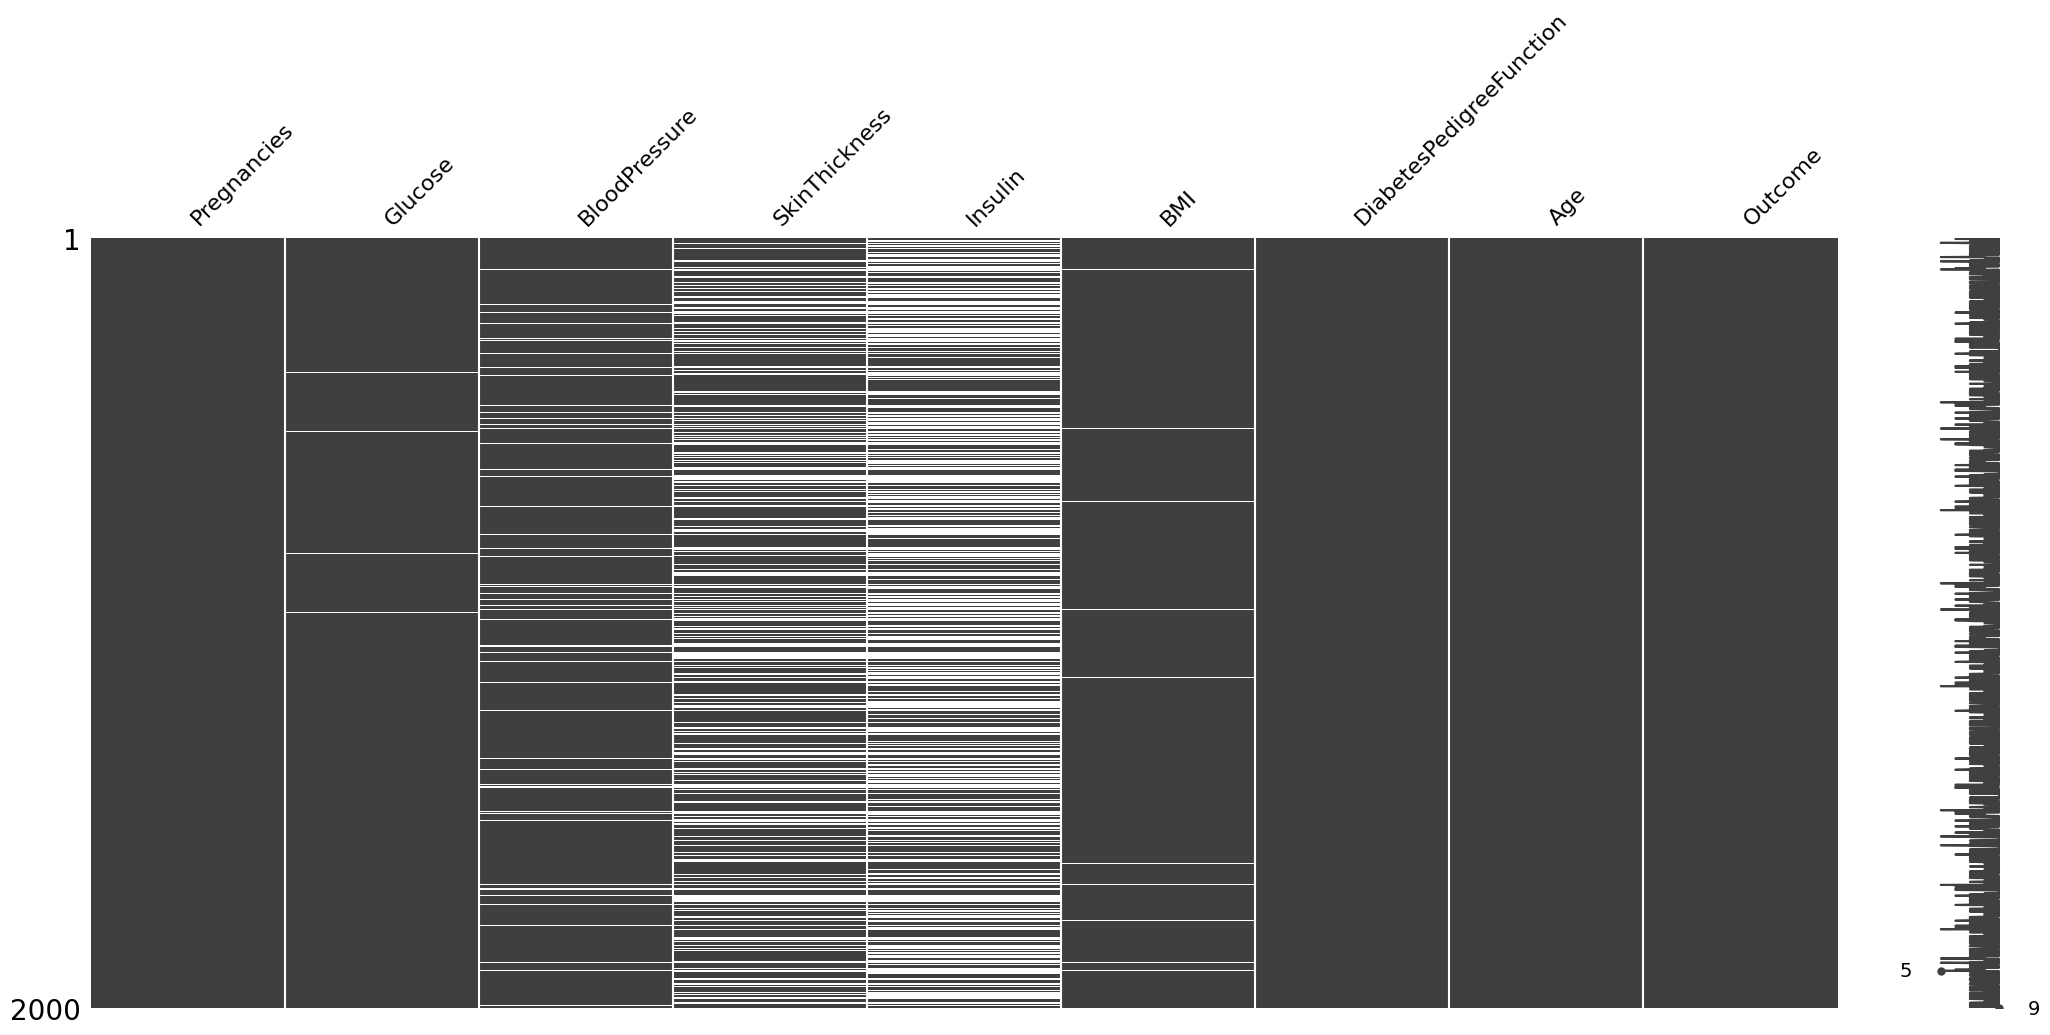

In [ ]:
msno.matrix(data)
plt.show()

In [ ]:
def median_target(var):
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

columns = data.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    data.loc[(data['Outcome'] == 0 ) & (data[i].isnull()), i] = median_target(i)[i][0]
    data.loc[(data['Outcome'] == 1 ) & (data[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
display(data.head(10))

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2    138.0           62.0           35.0    167.0  33.6   
1            0     84.0           82.0           31.0    125.0  38.2   
2            0    145.0           75.0           32.0    167.0  44.2   
3            0    135.0           68.0           42.0    250.0  42.3   
4            1    139.0           62.0           41.0    480.0  40.7   
5            0    173.0           78.0           32.0    265.0  46.5   
6            4     99.0           72.0           17.0    105.0  25.6   
7            8    194.0           80.0           27.0    105.0  26.1   
8            2     83.0           65.0           28.0     66.0  36.8   
9            2     89.0           90.0           30.0    105.0  33.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0  
5                     1.159   58        0  
6                     0.294   28        0  
7                     0.551   67        0  
8                     0.629   24        0  
9                     0.292   42        0

In [ ]:
data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

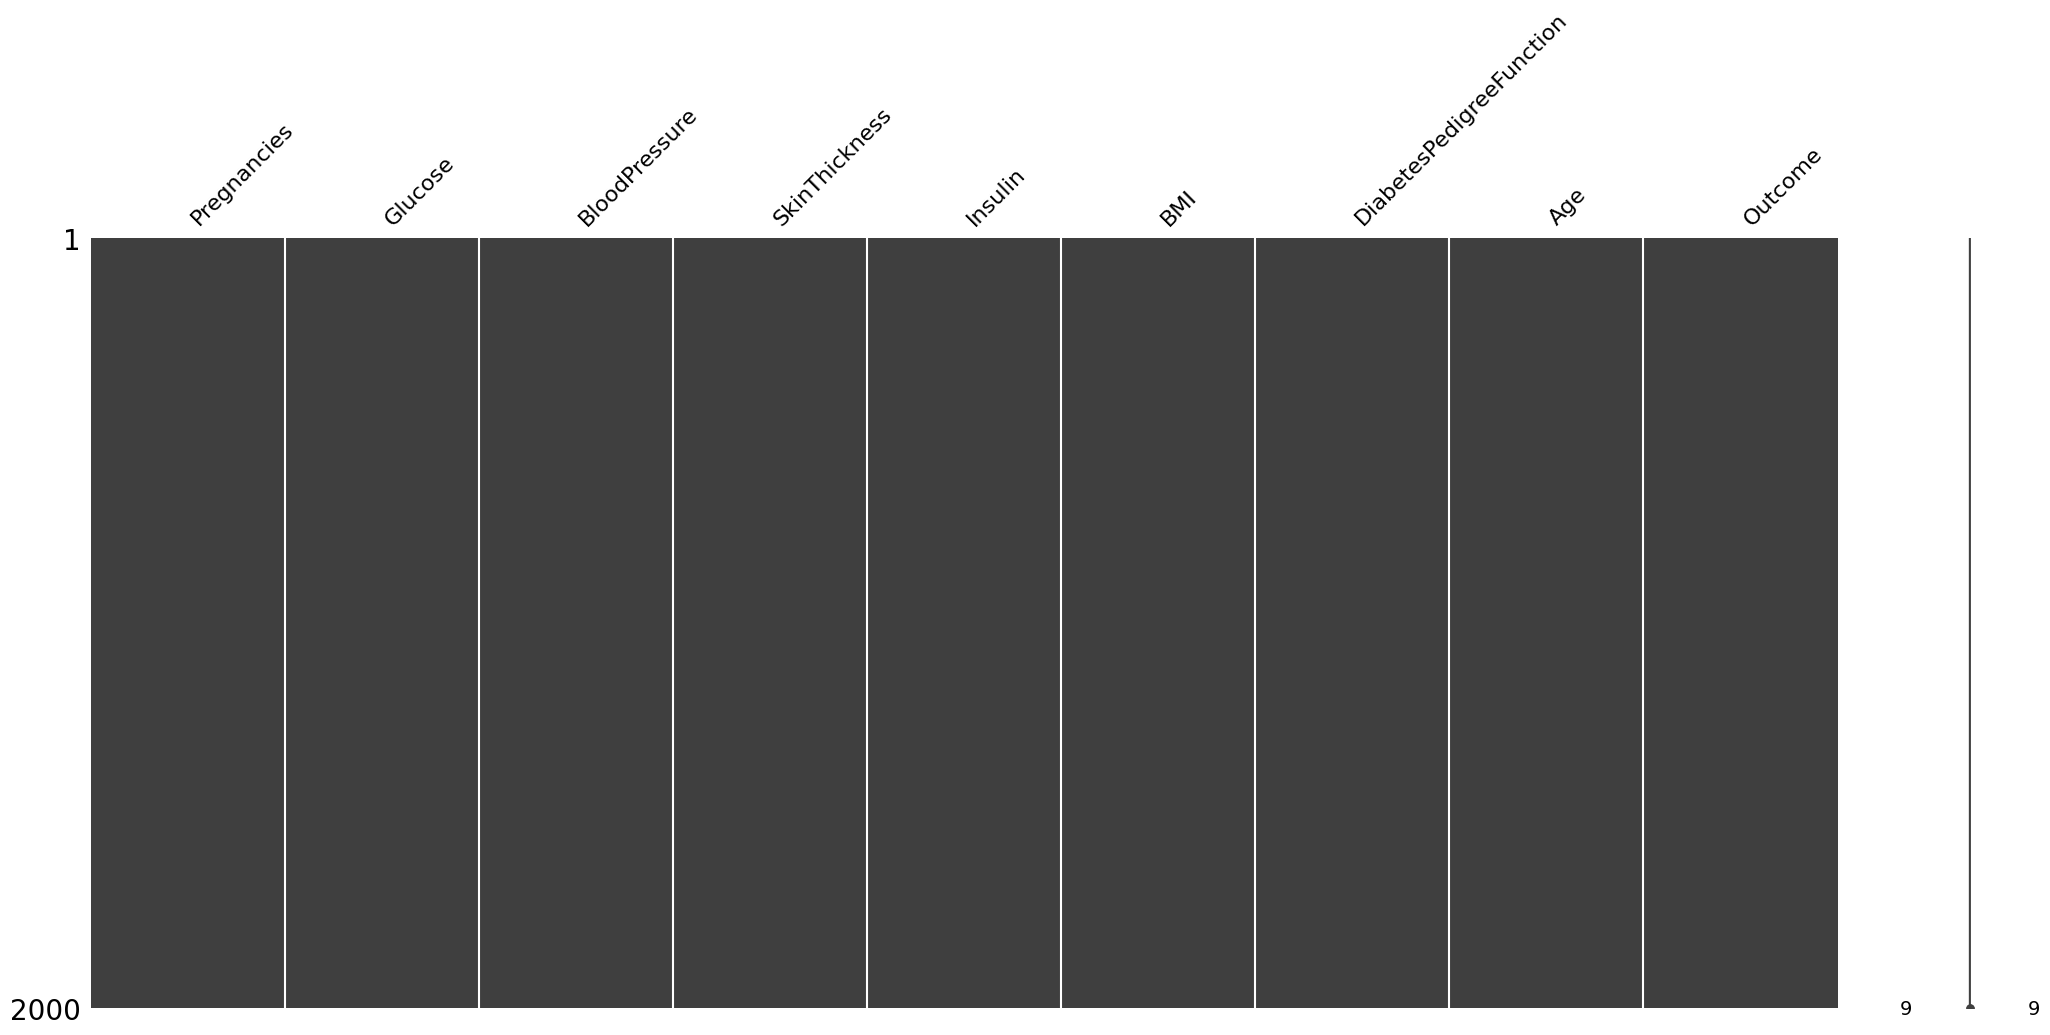

In [ ]:
msno.matrix(data)
plt.show()

 OUTLIERS ANALYSIS

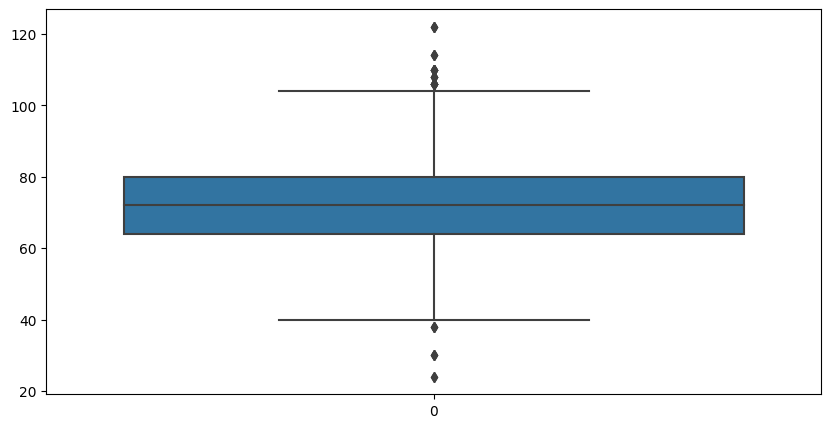

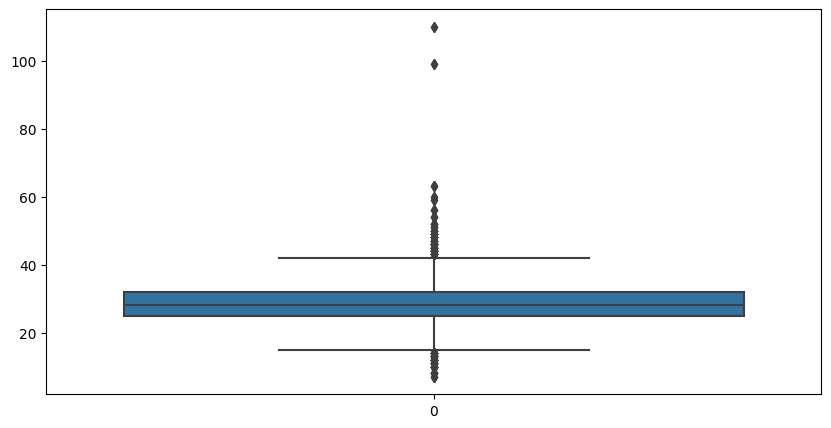

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(data.BloodPressure)
plt.show()

fig = plt.figure(figsize=(10,5))
sns.boxplot(data.SkinThickness)
plt.show()

In [ ]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
    else:
        print(variable, "no")

def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
for col in data.columns:
    has_outliers(data,col)

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


In [ ]:
replace_with_thresholds(data, data.columns)


In [ ]:
for col in data.columns:
    has_outliers(data,col)

Pregnancies no
Glucose no
BloodPressure no
SkinThickness no
Insulin no
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


In [ ]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0    138.0           62.0           35.0    167.0  33.6   
1          0.0     84.0           82.0           31.0    125.0  38.2   
2          0.0    145.0           75.0           32.0    167.0  44.2   
3          0.0    135.0           68.0           42.0    250.0  42.3   
4          1.0    139.0           62.0           41.0    260.0  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47      1.0  
1                     0.233   23      0.0  
2                     0.630   31      1.0  
3                     0.365   24      1.0  
4                     0.536   21      0.0

In [ ]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Feature Engineering


FEATURE IMPORTANCE USING RANDOME_FORREST_CLASSIFIER

In [ ]:
X=[]
Y=[]
features = list(data.columns.values)
features.remove('Outcome')
print(features)
X = data.iloc[:,0:8].values
Y = data['Outcome']

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             2.0    138.0           62.0           35.0    167.0  33.6   
1             0.0     84.0           82.0           31.0    125.0  38.2   
2             0.0    145.0           75.0           32.0    167.0  44.2   
3             0.0    135.0           68.0           42.0    250.0  42.3   
4             1.0    139.0           62.0           41.0    260.0  40.7   
...           ...      ...            ...            ...      ...   ...   
1995          2.0     75.0           64.0           24.0     55.0  29.7   
1996          8.0    179.0           72.0           42.0    130.0  32.7   
1997          6.0     85.0           78.0           27.0    105.0  31.2   
1998          0.0    129.0          104.0           42.5    130.0  50.6   
1999          2.0     81.0           72.0           15.0     76.0  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.127   47      1.0  
1                        0.233   23      0.0  
2                        0.630   31      1.0  
3                        0.365   24      1.0  
4                        0.536   21      0.0  
...                        ...  ...      ...  
1995                     0.370   33      0.0  
1996                     0.719   36      1.0  
1997                     0.382   42      0.0  
1998                     0.319   26      1.0  
1999                     0.547   25      0.0  

[2000 rows x 9 columns]

In [ ]:
X.shape

(2000, 8)

In [ ]:
Y.shape

(2000,)

In [ ]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=12)

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
importance = rf.feature_importances_*1000

print(importance)

[ 23.41383706  82.2818431   41.94314087  57.98143254 584.41055559
  52.1728957   46.60582804 111.1904671 ]


Text(0.5, 0, 'Random Forest Feature Importance')

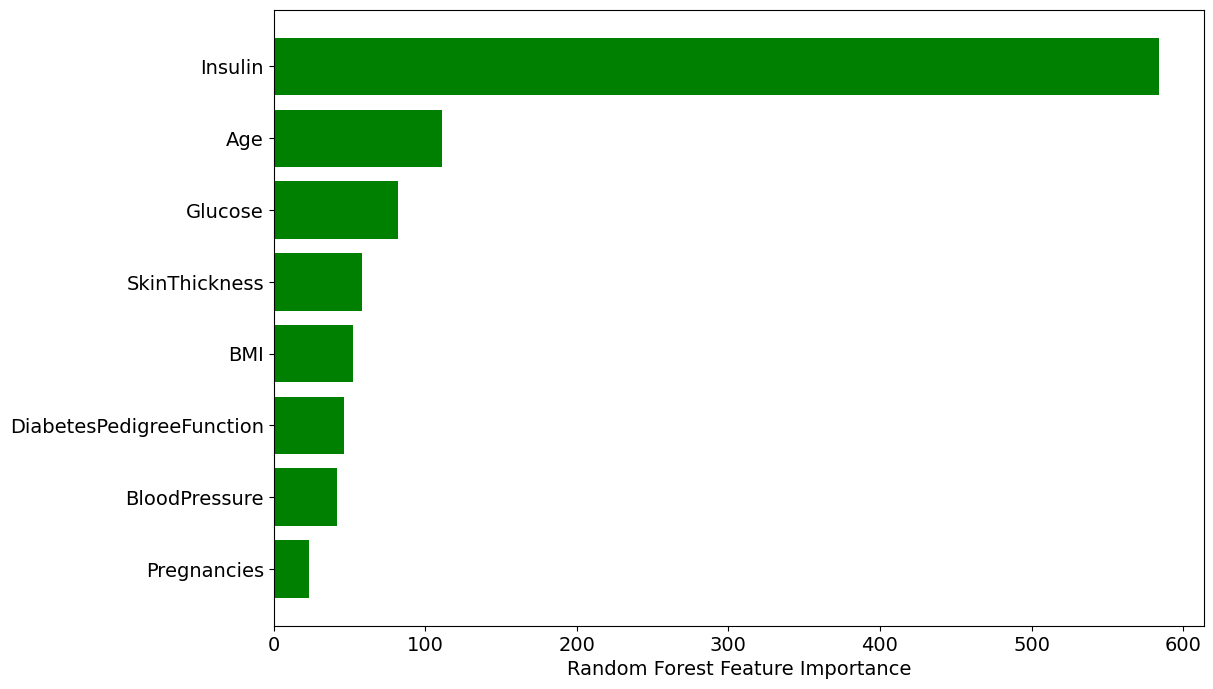

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh([features[i] for i in sorted_idx], [importance[i] for i in sorted_idx],color ='green')
plt.xlabel("Random Forest Feature Importance")


PCA FEATURE SELECTION

(2000, 8)


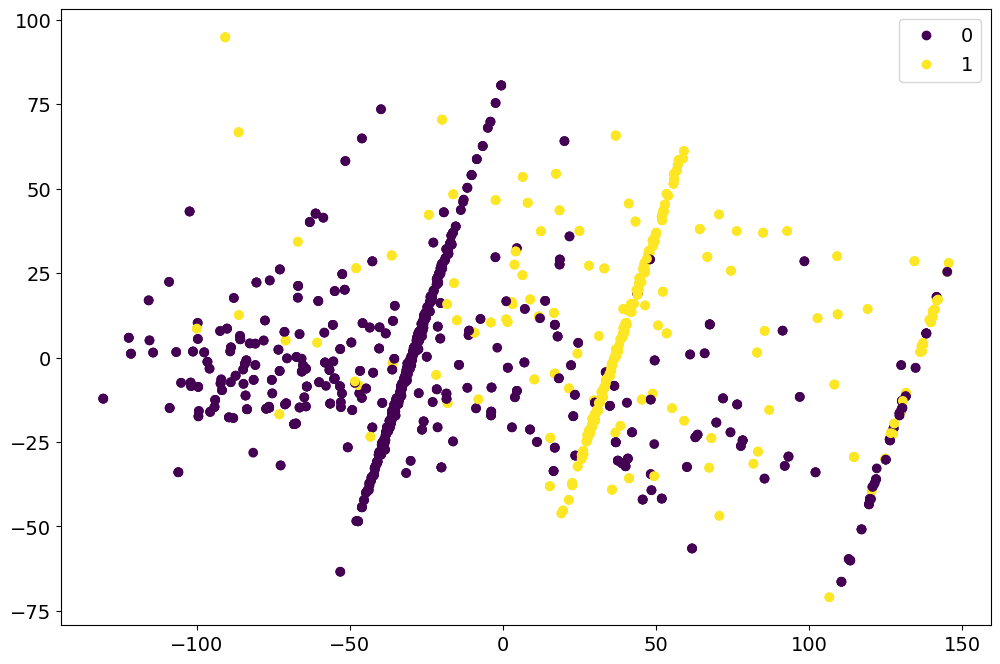

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
Xt = pca.fit_transform(X)
print(Xt.shape)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=Y)
plt.legend(handles=plot.legend_elements()[0], labels=['0','1'],)
plt.show()

In [ ]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             2.0    138.0           62.0           35.0    167.0  33.6   
1             0.0     84.0           82.0           31.0    125.0  38.2   
2             0.0    145.0           75.0           32.0    167.0  44.2   
3             0.0    135.0           68.0           42.0    250.0  42.3   
4             1.0    139.0           62.0           41.0    260.0  40.7   
...           ...      ...            ...            ...      ...   ...   
1995          2.0     75.0           64.0           24.0     55.0  29.7   
1996          8.0    179.0           72.0           42.0    130.0  32.7   
1997          6.0     85.0           78.0           27.0    105.0  31.2   
1998          0.0    129.0          104.0           42.5    130.0  50.6   
1999          2.0     81.0           72.0           15.0     76.0  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.127   47      1.0  
1                        0.233   23      0.0  
2                        0.630   31      1.0  
3                        0.365   24      1.0  
4                        0.536   21      0.0  
...                        ...  ...      ...  
1995                     0.370   33      0.0  
1996                     0.719   36      1.0  
1997                     0.382   42      0.0  
1998                     0.319   26      1.0  
1999                     0.547   25      0.0  

[2000 rows x 9 columns]

## Cross_Validation With K-FOLDS

split data into training and test sets

In [ ]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

In [ ]:
# for train_index, test_index in cv.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)

In [ ]:

clf = SVC(kernel='linear', C=1, random_state=42)
clf1=RandomForestClassifier(max_depth = 8,
                                  max_features = 5,
                                  min_samples_split = 2,
                                  n_estimators = 500)
clf2=KNeighborsClassifier(2)
clf3=LogisticRegression(solver = "liblinear")
clf4=DecisionTreeClassifier(criterion = "entropy", max_depth = 12)
clf5=GaussianNB()
clf6=MultinomialNB()
clf7=BernoulliNB()

## SVM Classifier

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}

In [ ]:
Acc_Cross_Val2= cross_val_score(clf, X, Y, cv=cv,scoring=scoring['accuracy'])
print("cross_val_score_svm",Acc_Cross_Val2)
print("cross_val_score_svm_all_folds",Acc_Cross_Val2.mean())
Recall_Cross_Val2  =cross_val_score(clf, X, Y, cv=cv,scoring=scoring['recall'])
print('recall_val_svm',Recall_Cross_Val2)
print('recall_val_svm_all_folds',Recall_Cross_Val2.mean())
precision_Cross_Val2=cross_val_score(clf, X, Y, cv=cv,scoring=scoring['precision'])
print('precision_val_svm',precision_Cross_Val2)
print('precision_val_svm_all_folds',precision_Cross_Val2.mean())

cross_val_score_svm [0.81666667 0.79833333 0.81166667 0.80833333 0.82666667]
cross_val_score_svm_all_folds 0.8123333333333335
recall_val_svm [0.67487685 0.70892019 0.66666667 0.73737374 0.74634146]
recall_val_svm_all_folds 0.7068357805078211
precision_val_svm [0.75690608 0.71904762 0.73033708 0.69856459 0.74634146]
precision_val_svm_all_folds 0.730239366352688


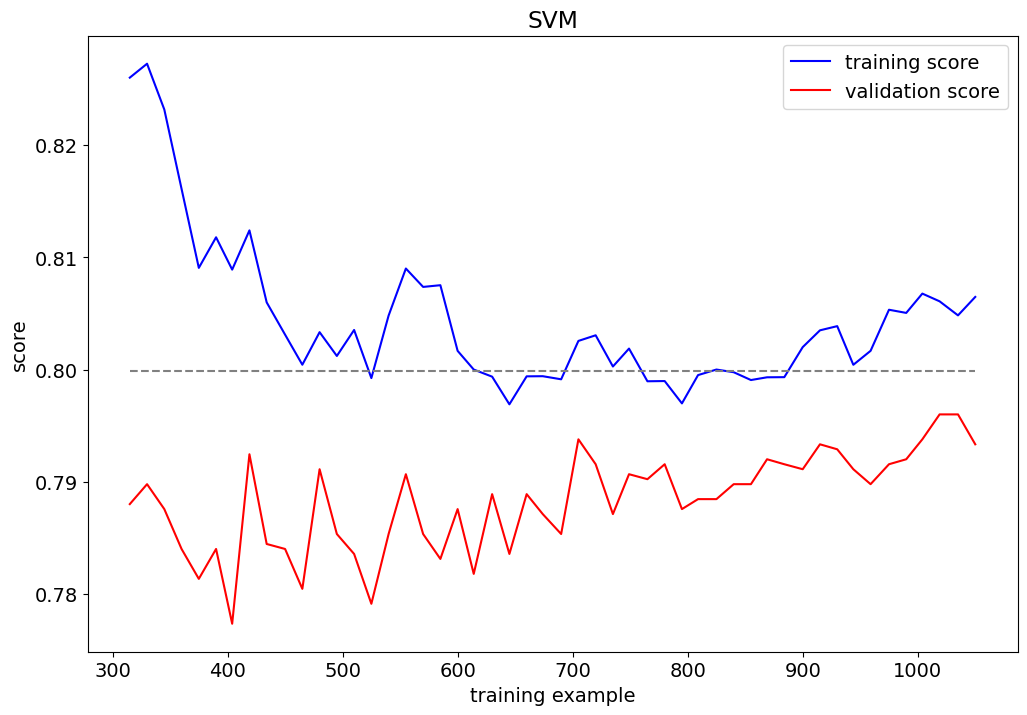

In [ ]:
from sklearn.model_selection import learning_curve

N, train_lc_svm, val_lc_svm = learning_curve(clf,X_train, y_train, cv=cv,train_sizes=np.linspace(0.3, 1, 50))

plt.plot(N, np.mean(train_lc_svm, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc_svm, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc_svm[-1], val_lc_svm[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

plt.title('SVM')
plt.xlabel('training example')
plt.ylabel('score')
plt.legend(loc='best')


##  curvesبسبب تقارب ال underfit or overfit نلاحظ عدم وجود

## RandomForest Classifier

In [ ]:
Acc_Cross_Val2= cross_val_score(clf1, X, Y, cv=cv,scoring=scoring['accuracy'])
print(Acc_Cross_Val2.mean())
Recall_Cross_Val2  =cross_val_score(clf1, X, Y, cv=cv,scoring=scoring['recall'])
print(Recall_Cross_Val2.mean())
precision_Cross_Val2=cross_val_score(clf1, X, Y, cv=cv,scoring=scoring['precision'])
print(precision_Cross_Val2.mean())

0.974
0.9547154591329481
0.9668230602432191


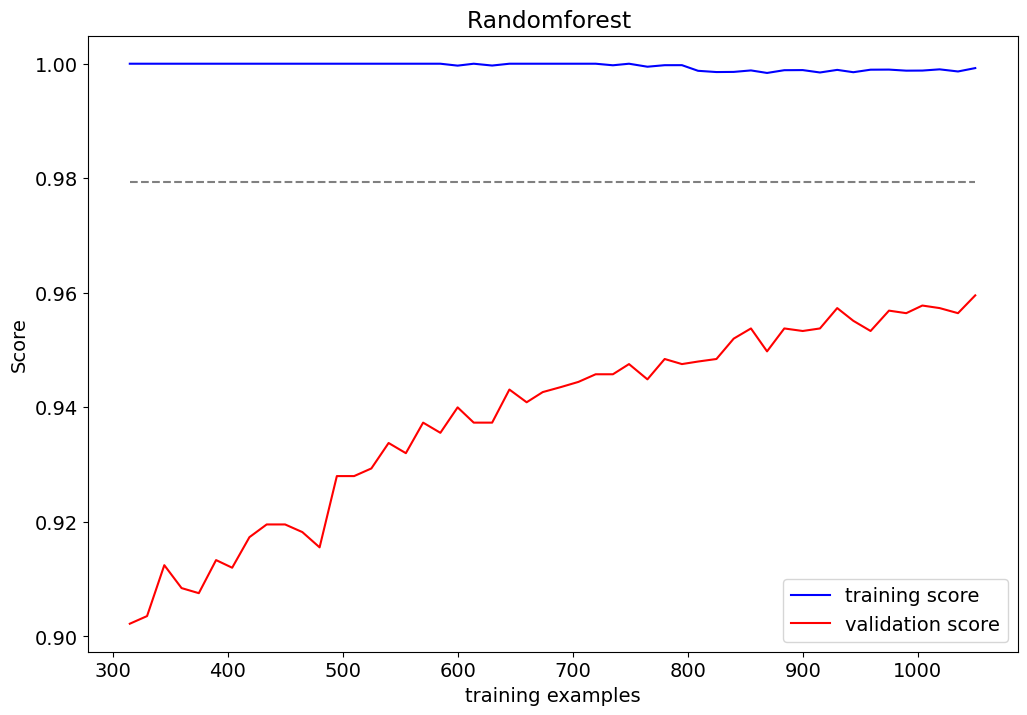

In [ ]:
from sklearn.model_selection import learning_curve

N, train_lc_randomF, val_lc_randomF = learning_curve(clf1,X_train, y_train, cv=cv,train_sizes=np.linspace(0.3, 1, 50))

plt.plot(N, np.mean(train_lc_randomF, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc_randomF, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc_randomF[-1], val_lc_randomF[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

plt.title('Randomforest ')
plt.xlabel('training examples')
plt.ylabel('Score')
plt.legend(loc='best')

## KNN Classifier

In [ ]:
Acc_Cross_Val3= cross_val_score(clf2, X, Y, cv=cv,scoring=scoring['accuracy'])
print(Acc_Cross_Val3.mean())
Recall_Cross_Val3=cross_val_score(clf2, X, Y, cv=cv,scoring=scoring['recall'])
print(Recall_Cross_Val3.mean())
precision_Cross_Val3=cross_val_score(clf2, X, Y, cv=cv,scoring=scoring['precision'])
print(precision_Cross_Val3.mean())

0.9413333333333334
0.8591235928309336
0.9634714159367922


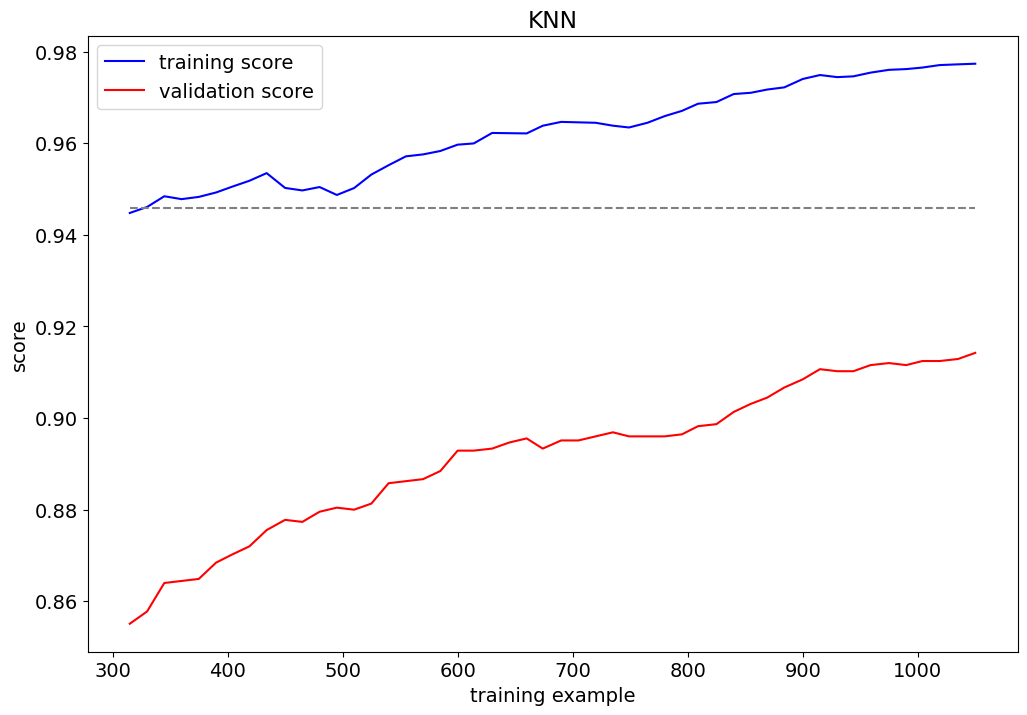

In [ ]:
from sklearn.model_selection import learning_curve

N, train_lc_knn, val_lc_knn = learning_curve(clf2,X_train, y_train, cv=cv,train_sizes=np.linspace(0.3, 1, 50))

plt.plot(N, np.mean(train_lc_knn, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc_knn, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc_knn[-1], val_lc_knn[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

plt.title('KNN')
plt.xlabel('training example')
plt.ylabel('score')
plt.legend(loc='best')

## Logistic Regression

In [ ]:
Acc_Cross_Val4= cross_val_score(clf3, X, Y, cv=cv,scoring=scoring['accuracy'])
print(Acc_Cross_Val4.mean())
Recall_Cross_Val4=cross_val_score(clf3, X, Y, cv=cv,scoring=scoring['recall'])
print(Recall_Cross_Val4.mean())
precision_Cross_Val4=cross_val_score(clf3, X, Y, cv=cv,scoring=scoring['precision'])
print(precision_Cross_Val4.mean())

0.804
0.634982230061537
0.7472524205048423


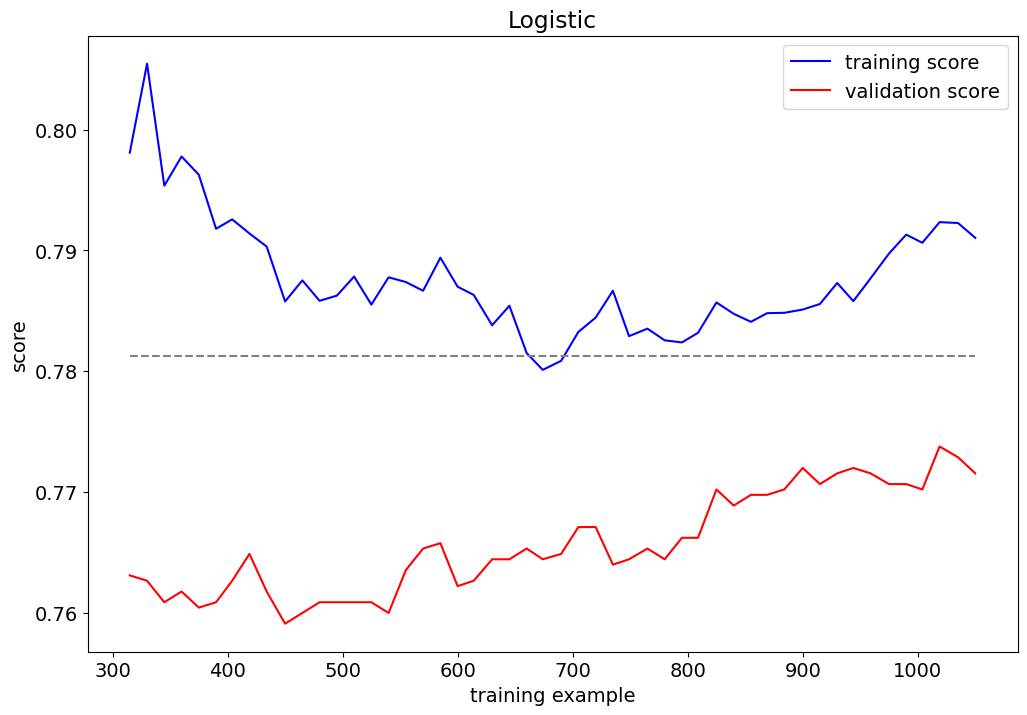

In [ ]:
from sklearn.model_selection import learning_curve

N, train_lc_logistic, val_lc_logistic = learning_curve(clf3,X_train, y_train, cv=cv,train_sizes=np.linspace(0.3, 1, 50))

plt.plot(N, np.mean(train_lc_logistic, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc_logistic, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc_logistic[-1], val_lc_logistic[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

plt.title('Logistic')
plt.xlabel('training example')
plt.ylabel('score')
plt.legend(loc='best')

## DecisionTree Classifier

In [ ]:
Acc_Cross_Val5= cross_val_score(clf4, X, Y, cv=cv,scoring=scoring['accuracy'])
print(Acc_Cross_Val5.mean())
Recall_Cross_Val5=cross_val_score(clf4, X, Y, cv=cv,scoring=scoring['recall'])
print(Recall_Cross_Val5.mean())
precision_Cross_Val5=cross_val_score(clf4, X, Y, cv=cv,scoring=scoring['precision'])
print(precision_Cross_Val5.mean())

0.975
0.9684569120741072
0.9555119418268365


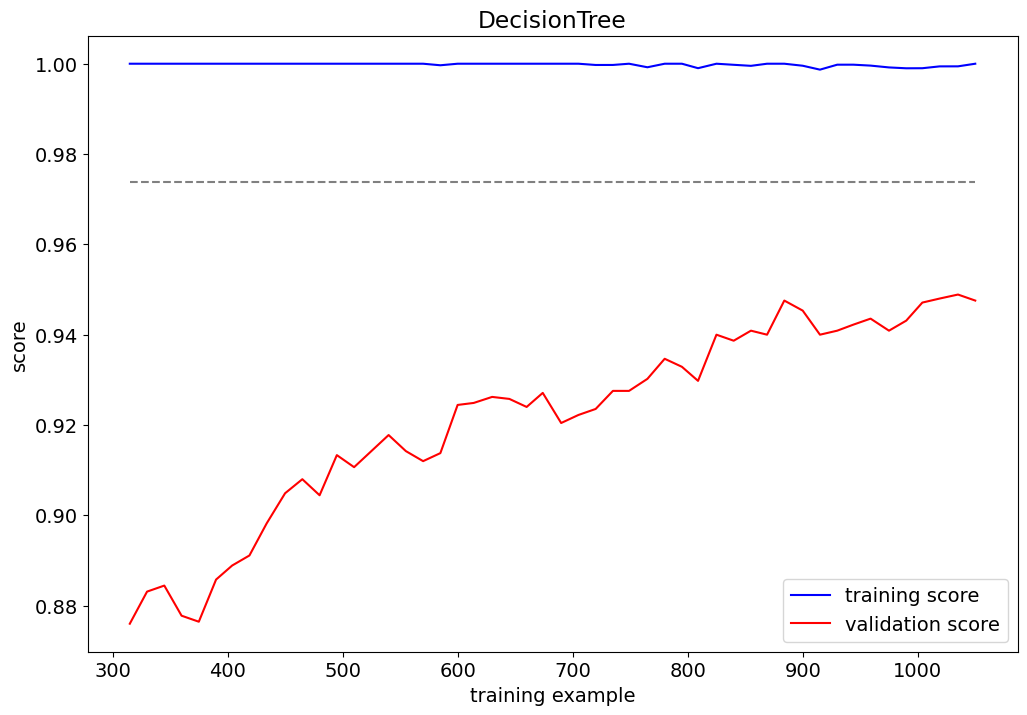

In [ ]:
from sklearn.model_selection import learning_curve

N, train_lc_tree, val_lc_tree = learning_curve(clf4,X_train, y_train, cv=cv,train_sizes=np.linspace(0.3, 1, 50))

plt.plot(N, np.mean(train_lc_tree, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc_tree, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc_tree[-1], val_lc_tree[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

plt.title('DecisionTree')
plt.xlabel('training example')
plt.ylabel('score')
plt.legend(loc='best')

## GaussianNB

In [ ]:
Acc_Cross_Val6= cross_val_score(clf5, X, Y, cv=cv,scoring=scoring['accuracy'])
print(Acc_Cross_Val6.mean())
Recall_Cross_Val6=cross_val_score(clf5, X, Y, cv=cv,scoring=scoring['recall'])
print(Recall_Cross_Val6.mean())
precision_Cross_Val6=cross_val_score(clf5, X, Y, cv=cv,scoring=scoring['precision'])
print(precision_Cross_Val6.mean())

0.8076666666666668
0.7208529940204089
0.713007143971647


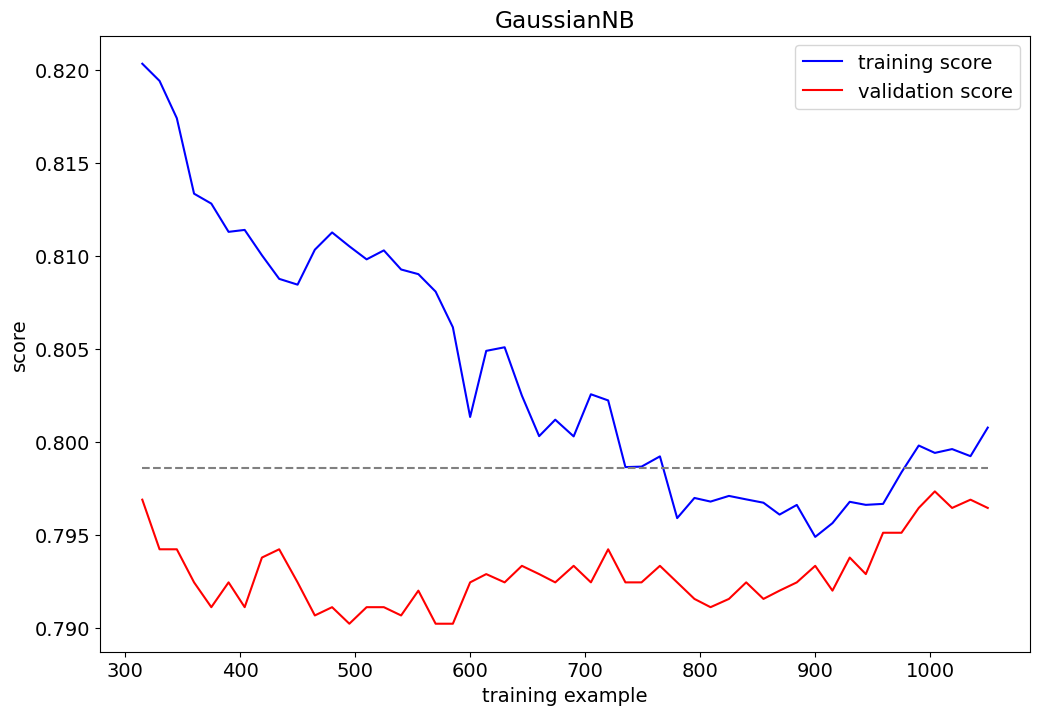

In [ ]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import learning_curve

N, train_lc_Gaussian, val_lc_Gaussian = learning_curve(clf5,X_train, y_train, cv=cv,train_sizes=np.linspace(0.3, 1, 50))

plt.plot(N, np.mean(train_lc_Gaussian, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc_Gaussian, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc_Gaussian[-1], val_lc_Gaussian[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

plt.title('GaussianNB')
plt.xlabel('training example')
plt.ylabel('score')
plt.legend(loc='best')

## MultinomialNB

In [ ]:
Acc_Cross_Val7= cross_val_score(clf6, X, Y, cv=cv,scoring=scoring['accuracy'])
print(Acc_Cross_Val7.mean())
Recall_Cross_Val7=cross_val_score(clf6, X, Y, cv=cv,scoring=scoring['recall'])
print(Recall_Cross_Val7.mean())
precision_Cross_Val7=cross_val_score(clf6, X, Y, cv=cv,scoring=scoring['precision'])
print(precision_Cross_Val7.mean())

0.7746666666666666
0.732823858931015
0.6477905743494667


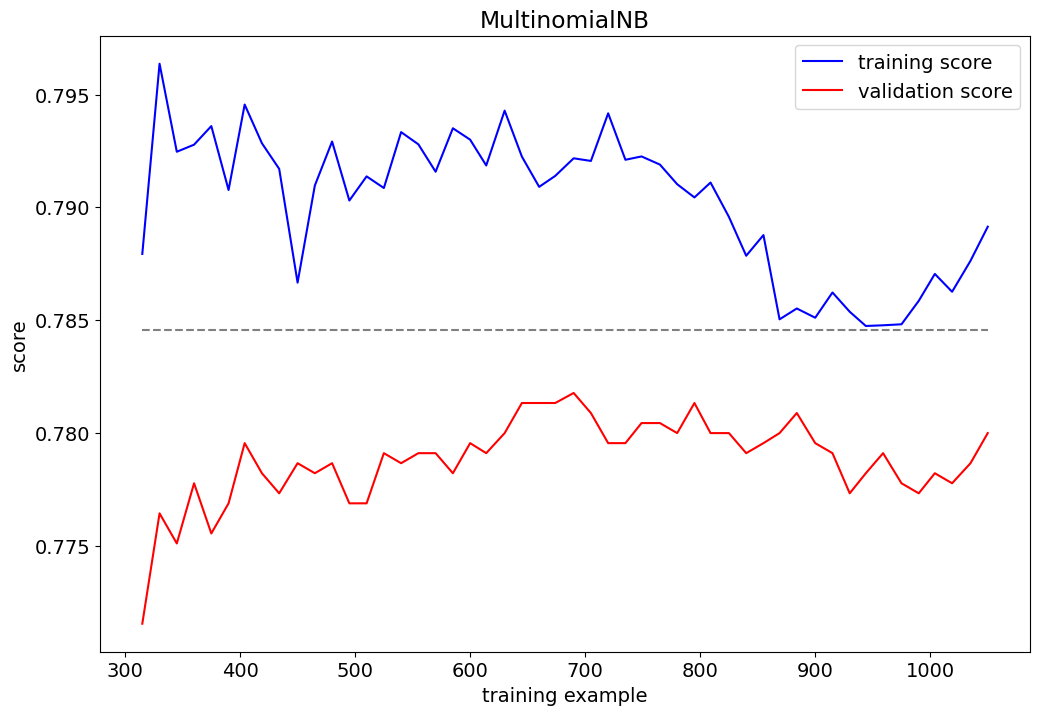

In [ ]:
from sklearn.model_selection import learning_curve

N, train_lc_Multinomial, val_lc_Multinomial = learning_curve(clf6,X_train, y_train, cv=cv,train_sizes=np.linspace(0.3, 1, 50))

plt.plot(N, np.mean(train_lc_Multinomial, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc_Multinomial, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc_Multinomial[-1], val_lc_Multinomial[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

plt.title('MultinomialNB')
plt.xlabel('training example')
plt.ylabel('score')
plt.legend(loc='best')

## BernoulliNB

In [ ]:
Acc_Cross_Val8= cross_val_score(clf7, X, Y, cv=cv,scoring=scoring['accuracy'])
print(Acc_Cross_Val8.mean())
Recall_Cross_Val8=cross_val_score(clf7, X, Y, cv=cv,scoring=scoring['recall'])
print(Recall_Cross_Val8.mean())
precision_Cross_Val8=cross_val_score(clf7, X, Y, cv=cv,scoring=scoring['precision'])
print(precision_Cross_Val8.mean())

0.662
0.0
0.0


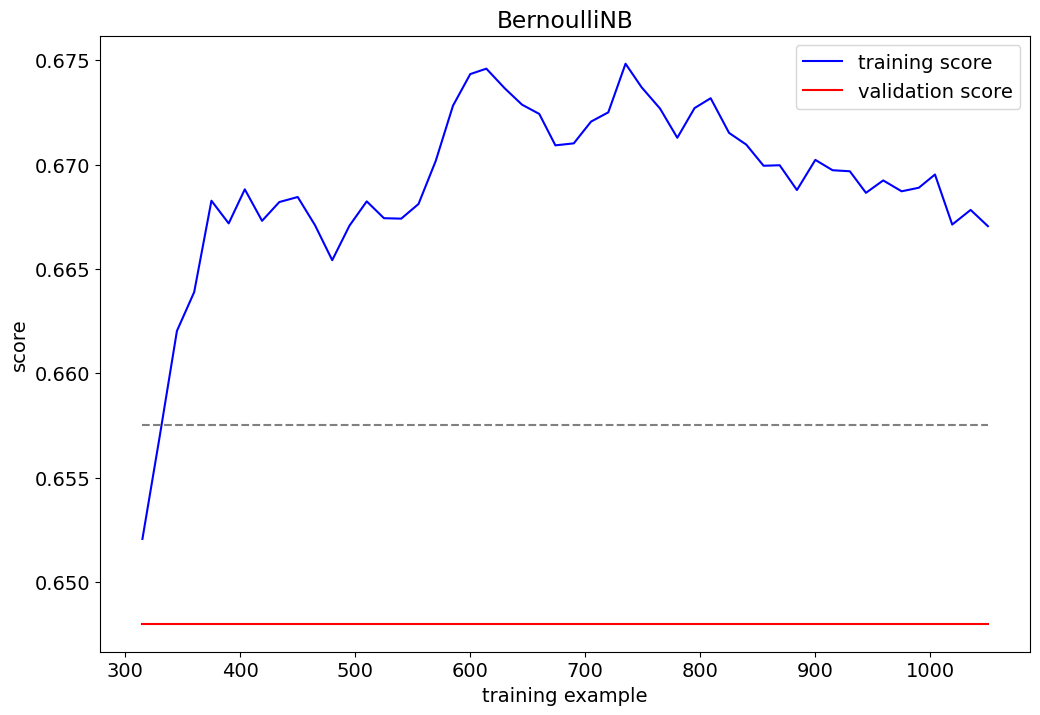

In [ ]:
from sklearn.model_selection import learning_curve


N, train_lc_Bernoulli, val_lc_Bernoulli = learning_curve(clf7,X_train, y_train, cv=cv,train_sizes=np.linspace(0.3, 1, 50))

plt.plot(N, np.mean(train_lc_Bernoulli, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc_Bernoulli, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc_Bernoulli[-1], val_lc_Bernoulli[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

plt.title('BernoulliNB')
plt.xlabel('training example')
plt.ylabel('score')
plt.legend(loc='best')

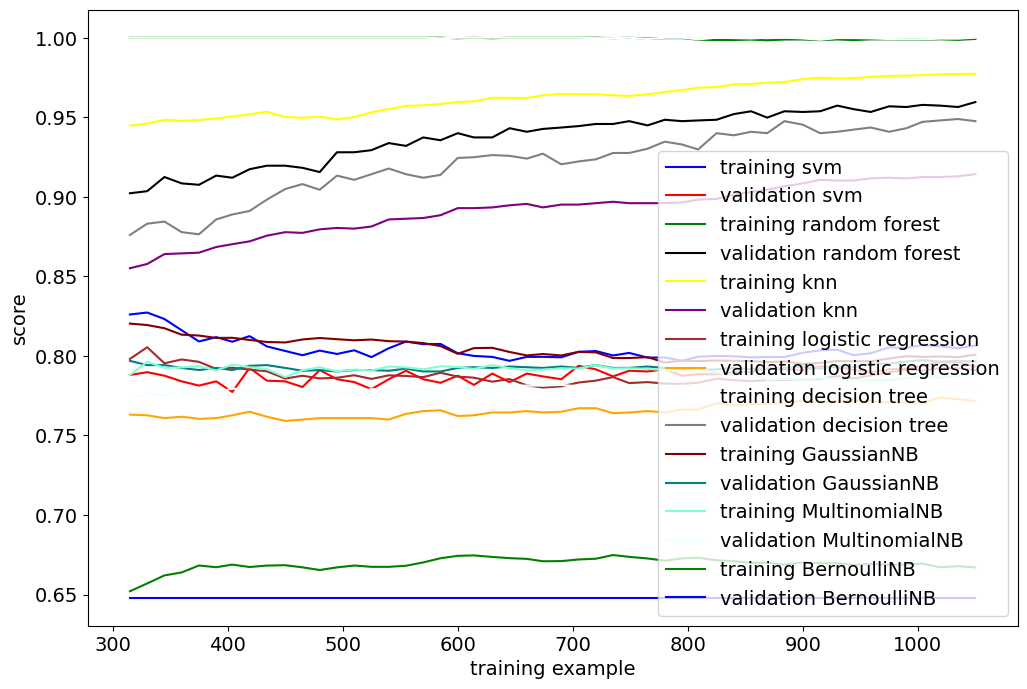

In [ ]:
plt.plot(N, np.mean(train_lc_svm, 1), color='blue', label='training svm')
plt.plot(N, np.mean(val_lc_svm, 1), color='red', label='validation svm')
plt.plot(N, np.mean(train_lc_randomF, 1), color='green', label='training random forest')
plt.plot(N, np.mean(val_lc_randomF, 1), color='black', label='validation random forest')
plt.plot(N, np.mean(train_lc_knn, 1), color='yellow', label='training knn')
plt.plot(N, np.mean(val_lc_knn, 1), color='purple', label='validation knn')
plt.plot(N, np.mean(train_lc_logistic, 1), color='brown', label='training logistic regression')
plt.plot(N, np.mean(val_lc_logistic, 1), color='Orange', label='validation logistic regression')
plt.plot(N, np.mean(train_lc_tree, 1), color='White', label='training decision tree')
plt.plot(N, np.mean(val_lc_tree, 1), color='gray', label='validation decision tree')
plt.plot(N, np.mean(train_lc_Gaussian, 1), color='maroon', label='training GaussianNB')
plt.plot(N, np.mean(val_lc_Gaussian, 1), color='teal', label='validation GaussianNB')
plt.plot(N, np.mean(train_lc_Multinomial, 1), color='aquamarine', label='training MultinomialNB')
plt.plot(N, np.mean(val_lc_Multinomial, 1), color='azure', label='validation MultinomialNB')
plt.plot(N, np.mean(train_lc_Bernoulli, 1), color='green', label='training BernoulliNB')
plt.plot(N, np.mean(val_lc_Bernoulli, 1), color='blue', label='validation BernoulliNB')

plt.xlabel('training example')
plt.ylabel('score')
plt.legend()
plt.show()






## Modeling :

In [ ]:
pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.7-py3-none-any.whl size=143860 sha256=0db7cacb828c5f5a4211e6a14eceb4cef2262b44ab4bbba5a2067a5d7d62b556
  Stored in directory: /root/.cache/pip/wheels/a

In [ ]:
import mlflow
from mlflow import MlflowClient
def fetch_logged_data(run_id):
    client = MlflowClient()
    data = client.get_run(run_id).data
    tags = {k: v for k, v in data.tags.items() if not k.startswith("mlflow.")}
    artifacts = [f.path for f in client.list_artifacts(run_id, "model")]
    return data.params, data.metrics, tags, artifacts

# 1- KNN :

In [ ]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)


2023/06/17 15:01:46 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '277fb5146f334fc686e64e602f5118f4', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/17 15:01:46 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


In [ ]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.914

In [ ]:
knn_params = {"n_neighbors": np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

2023/06/17 15:01:50 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3410616847a14db5b0c6d736b91c6929', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/17 15:01:50 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'
2023/06/17 15:01:59 INFO mlflow.sklearn.utils: Logging the 5 best runs, 14 runs will be omitted.


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
print("Best KNN score:" + str(knn_cv.best_score_))
print("Best KNN parameter: " + str(knn_cv.best_params_))

Best KNN score:0.9813333333333333
Best KNN parameter: {'n_neighbors': 1}


tuning KNN model

In [ ]:
knn = KNeighborsClassifier(2)
knn_tuned = knn.fit(X_train, y_train)

2023/06/17 15:02:12 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4dee0c0dcb00441cbae1259e84df924c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/17 15:02:12 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


In [ ]:
y_pred = knn_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.966

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.97
Precision: 0.99
Recall: 0.91
F1: 0.95


mlflow

In [ ]:
# enable autologging
mlflow.sklearn.autolog()

with mlflow.start_run() as run:
    knn_cv.fit(X_train, y_train)

# fetch logged data
params, metrics, tags, artifacts = fetch_logged_data(run.info.run_id)

2023/06/17 15:02:33 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'
2023/06/17 15:02:41 INFO mlflow.sklearn.utils: Logging the 5 best runs, 14 runs will be omitted.


In [ ]:
params

{'refit': 'True',
 'cv': '10',
 'n_jobs': 'None',
 'pre_dispatch': '2*n_jobs',
 'verbose': '0',
 'best_n_neighbors': '1',
 'estimator': 'KNeighborsClassifier()',
 'param_grid': "{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,\n       18, 19])}",
 'error_score': 'nan',
 'return_train_score': 'False',
 'scoring': 'None'}

In [ ]:
metrics

{'training_recall_score': 1.0,
 'training_log_loss': 2.2204460492503136e-16,
 'training_precision_score': 1.0,
 'training_score': 1.0,
 'best_cv_score': 0.9813333333333333,
 'training_accuracy_score': 1.0,
 'training_roc_auc': 1.0,
 'training_f1_score': 1.0}

In [ ]:
tags

{'estimator_class': 'sklearn.model_selection._search.GridSearchCV',
 'estimator_name': 'GridSearchCV'}

In [ ]:
artifacts

['model/MLmodel',
 'model/conda.yaml',
 'model/model.pkl',
 'model/python_env.yaml',
 'model/requirements.txt']

ROC Curve

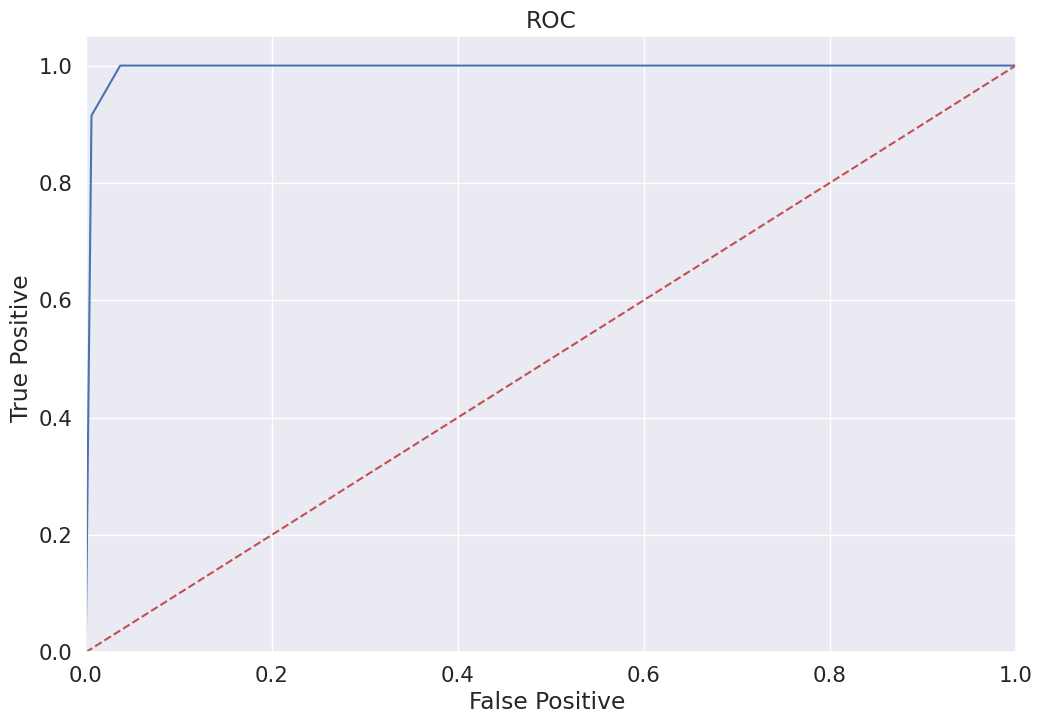

In [ ]:
logit_roc_auc1 = roc_auc_score(y_test, y_pred)

fpr1, tpr1, thresholds1 = roc_curve(y_test, knn_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr1, tpr1, label='AUC (area = %0.2f)' % logit_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC')
plt.show()


# 2- logistic regression

In [ ]:
log = LogisticRegression(solver = "liblinear")
log_model = log.fit(X_train,y_train)


2023/06/17 15:03:01 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '0fa31882f69148fea9ea14c0a8fe1779', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/17 15:03:01 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


In [ ]:
y_pred = log_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.806

confusion matrix and report

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86       324
         1.0       0.75      0.66      0.71       176

    accuracy                           0.81       500
   macro avg       0.79      0.77      0.78       500
weighted avg       0.80      0.81      0.80       500



In [ ]:
# enable autologging
mlflow.sklearn.autolog()

with mlflow.start_run() as run:
    log_model.fit(X_train, y_train)

# fetch logged data
params, metrics, tags, artifacts = fetch_logged_data(run.info.run_id)

2023/06/17 15:03:10 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


In [ ]:
params

{'fit_intercept': 'True',
 'penalty': 'l2',
 'n_jobs': 'None',
 'warm_start': 'False',
 'class_weight': 'None',
 'dual': 'False',
 'max_iter': '100',
 'verbose': '0',
 'intercept_scaling': '1',
 'C': '1.0',
 'multi_class': 'auto',
 'solver': 'liblinear',
 'l1_ratio': 'None',
 'tol': '0.0001',
 'random_state': 'None'}

In [ ]:
metrics

{'training_recall_score': 0.794,
 'training_log_loss': 0.4392294988107948,
 'training_precision_score': 0.7893764631495221,
 'training_score': 0.794,
 'training_accuracy_score': 0.794,
 'training_roc_auc': 0.8718805562611126,
 'training_f1_score': 0.7879294576193018}

In [ ]:
tags

{'estimator_class': 'sklearn.linear_model._logistic.LogisticRegression',
 'estimator_name': 'LogisticRegression'}

In [ ]:
artifacts

['model/MLmodel',
 'model/conda.yaml',
 'model/model.pkl',
 'model/python_env.yaml',
 'model/requirements.txt']


ROC Curve



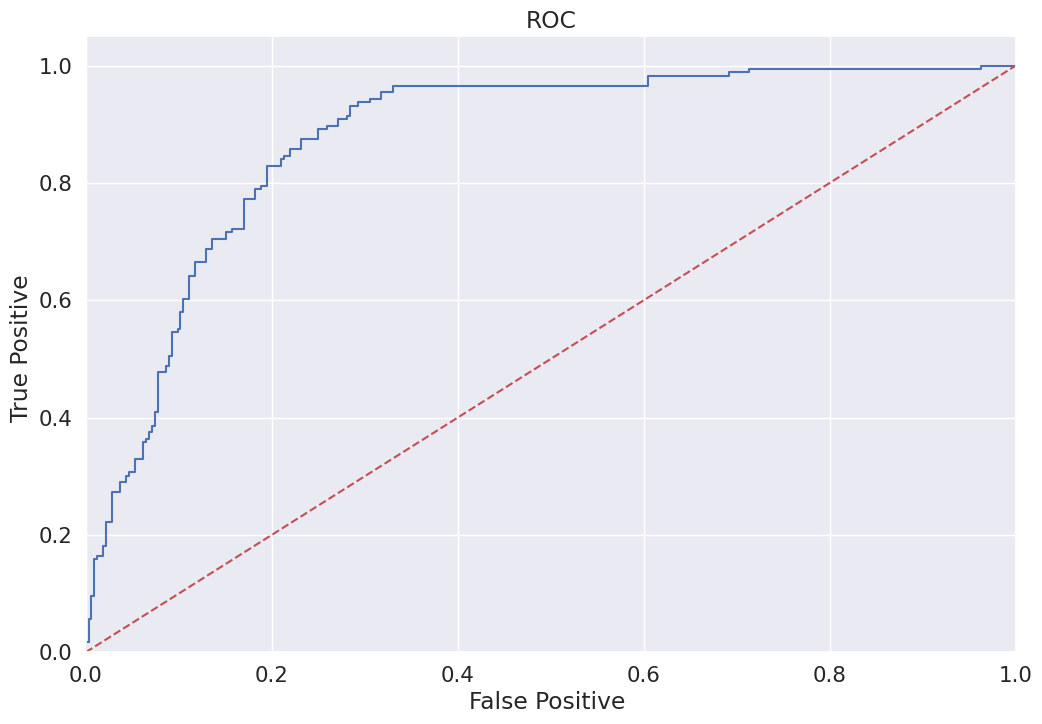

In [ ]:
logit_roc_auc2 = roc_auc_score(y_test, log_model.predict(X_test))

fpr2, tpr2, thresholds2 = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr2, tpr2, label='AUC (area = %0.2f)' % logit_roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC')
plt.show()

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.81
Precision: 0.75
Recall: 0.66
F1: 0.71


# 3-RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

2023/06/17 14:29:10 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '47c65b71eb2d45f7a93c29a92b29855a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/17 14:29:10 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


0.978

In [ ]:
rf_params = {"max_depth": [2,5,8],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)

rf_cv_model.fit(X_train, y_train)

2023/06/17 14:29:26 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '454d15fcccb146aaa213fba7eefef116', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/17 14:29:26 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Fitting 10 folds for each of 81 candidates, totalling 810 fits


2023/06/17 14:47:31 INFO mlflow.sklearn.utils: Logging the 5 best runs, 76 runs will be omitted.


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [ ]:
print("Best Params: " + str(rf_cv_model.best_params_))


Best Params: {'max_depth': 8, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 1000}


tuning randomforest

In [ ]:
rf_tuned_1 = RandomForestClassifier(max_depth = 8,
                                  max_features = 5,
                                  min_samples_split = 2,
                                  n_estimators = 1000)

In [ ]:
rf_tuned_1.fit(X_train, y_train)
y_pred = rf_tuned_1.predict(X_test)
accuracy_score(y_test, y_pred)

2023/06/17 14:50:35 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '03473c3e293b4ed0afce6a6ee9cb35ab', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/17 14:50:35 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


0.976

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.98
Precision: 0.97
Recall: 0.97
F1: 0.97


mlflow

In [ ]:
# enable autologging
mlflow.sklearn.autolog()

with mlflow.start_run() as run:
    rf_cv_model.fit(X_train, y_train)

# fetch logged data
params, metrics, tags, artifacts = fetch_logged_data(run.info.run_id)

2023/06/17 16:00:21 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Fitting 10 folds for each of 81 candidates, totalling 810 fits


2023/06/17 16:18:55 INFO mlflow.sklearn.utils: Logging the 5 best runs, 76 runs will be omitted.


In [ ]:
params

{'best_n_estimators': '500',
 'refit': 'True',
 'cv': '10',
 'n_jobs': '-1',
 'pre_dispatch': '2*n_jobs',
 'verbose': '2',
 'estimator': 'RandomForestClassifier()',
 'param_grid': "{'max_depth': [2, 5, 8], 'max_features': [2, 5, 8], 'n_estimators': [10, 500, 1000], 'min_samples_split': [2, 5, 10]}",
 'best_max_features': '5',
 'best_max_depth': '8',
 'error_score': 'nan',
 'return_train_score': 'False',
 'scoring': 'None',
 'best_min_samples_split': '2'}

In [ ]:
metrics

{'training_recall_score': 0.998,
 'training_log_loss': 0.04760394376730875,
 'training_precision_score': 0.9980000278080688,
 'training_score': 0.998,
 'best_cv_score': 0.9713333333333335,
 'training_accuracy_score': 0.998,
 'training_roc_auc': 0.999992062484125,
 'training_f1_score': 0.9979995185566627}

In [ ]:
tags

{'estimator_class': 'sklearn.model_selection._search.GridSearchCV',
 'estimator_name': 'GridSearchCV'}

In [ ]:
artifacts

['model/MLmodel',
 'model/conda.yaml',
 'model/model.pkl',
 'model/python_env.yaml',
 'model/requirements.txt']

confusion matrix and plot it

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       324
         1.0       0.97      0.97      0.97       176

    accuracy                           0.98       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.98      0.98      0.98       500



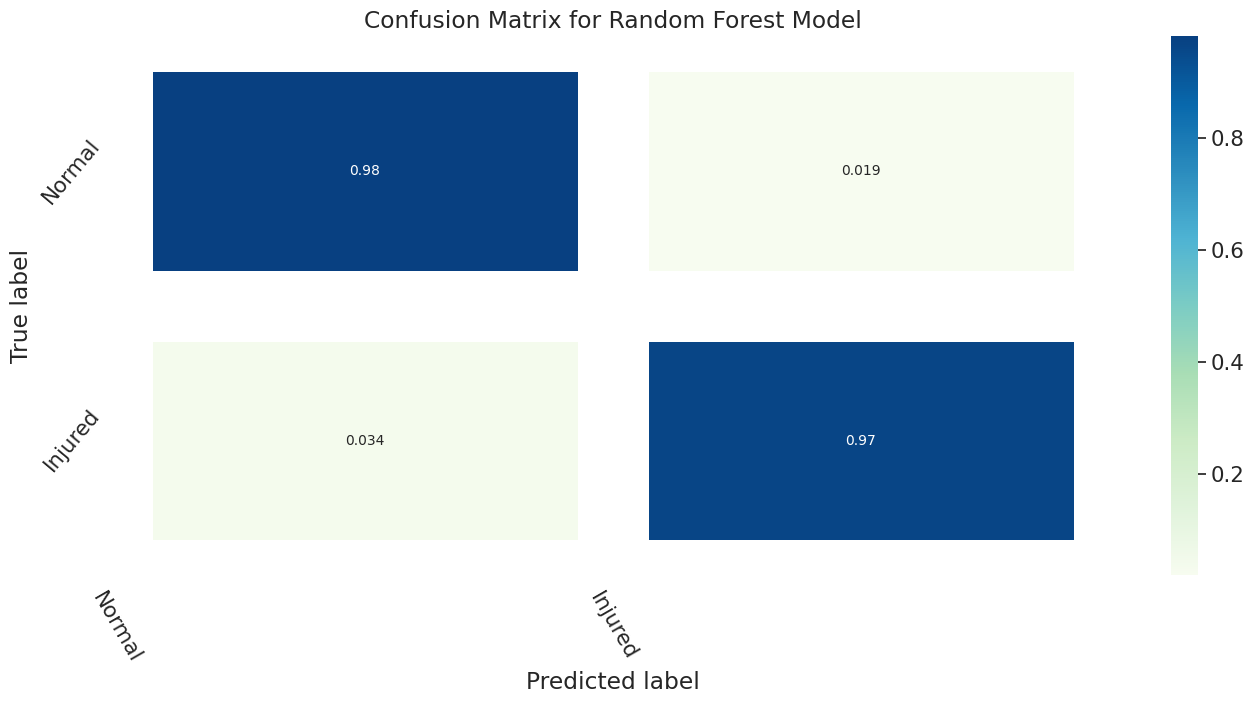

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.GnBu
            , linewidths=50)

# Add labels to the plot
class_names = ['Normal', 'Injured']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=300)
plt.yticks(tick_marks2, class_names, rotation=50)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# 4 - Decision Tree

In [ ]:
classifier = DecisionTreeClassifier(criterion = "entropy", max_depth = 12)
classifier.fit(X_train, y_train)

2023/06/17 14:52:13 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd800e7e4ccc0472fa0ea28c025bd9daf', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/17 14:52:13 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [ ]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.972

In [ ]:
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
# decision tree model
dtree_model=DecisionTreeClassifier()
#use gridsearch to test all values
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=10 ,n_jobs = -1,
                           verbose = 1)
#fit model to data
dtree_gscv.fit(X_train, y_train)

2023/06/17 14:57:12 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1a30f11e3d7445feaa0acb4c730103ae', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/17 14:57:12 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Fitting 10 folds for each of 24 candidates, totalling 240 fits


2023/06/17 14:57:25 INFO mlflow.sklearn.utils: Logging the 5 best runs, 19 runs will be omitted.


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             verbose=1)

In [ ]:
print("Best Params: " + str(dtree_gscv.best_params_))

Best Params: {'criterion': 'gini', 'max_depth': 12}


tuning decision tree

In [ ]:
classifier = DecisionTreeClassifier(criterion = "gini", max_depth = 12)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

2023/06/17 14:58:14 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd24b62511d0b45f3be620ff3fcb92b59', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/17 14:58:14 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


0.974

In [ ]:
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.5f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.5f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.5f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.97400
Precision: 0.95028
Recall: 0.97727
F1: 0.96359


mlflow

In [ ]:
# enable autologging
mlflow.sklearn.autolog()

with mlflow.start_run() as run:
    dtree_gscv.fit(X_train, y_train)

# fetch logged data
params, metrics, tags, artifacts = fetch_logged_data(run.info.run_id)

2023/06/17 14:58:39 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Fitting 10 folds for each of 24 candidates, totalling 240 fits


2023/06/17 14:58:47 INFO mlflow.sklearn.utils: Logging the 5 best runs, 19 runs will be omitted.


In [ ]:
params

{'refit': 'True',
 'cv': '10',
 'n_jobs': '-1',
 'best_criterion': 'gini',
 'pre_dispatch': '2*n_jobs',
 'verbose': '1',
 'estimator': 'DecisionTreeClassifier()',
 'param_grid': "{'criterion': ['gini', 'entropy'], 'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}",
 'best_max_depth': '11',
 'error_score': 'nan',
 'return_train_score': 'False',
 'scoring': 'None'}

In [ ]:
metrics

{'training_recall_score': 0.9993333333333333,
 'training_log_loss': 0.0012730283365898474,
 'training_precision_score': 0.9993340046995636,
 'training_score': 0.9993333333333333,
 'best_cv_score': 0.9746666666666668,
 'training_accuracy_score': 0.9993333333333333,
 'training_roc_auc': 0.9999980156210312,
 'training_f1_score': 0.9993331728522209}

In [ ]:
tags

{'estimator_class': 'sklearn.model_selection._search.GridSearchCV',
 'estimator_name': 'GridSearchCV'}

In [ ]:
artifacts

['model/MLmodel',
 'model/conda.yaml',
 'model/model.pkl',
 'model/python_env.yaml',
 'model/requirements.txt']

ROC Curve

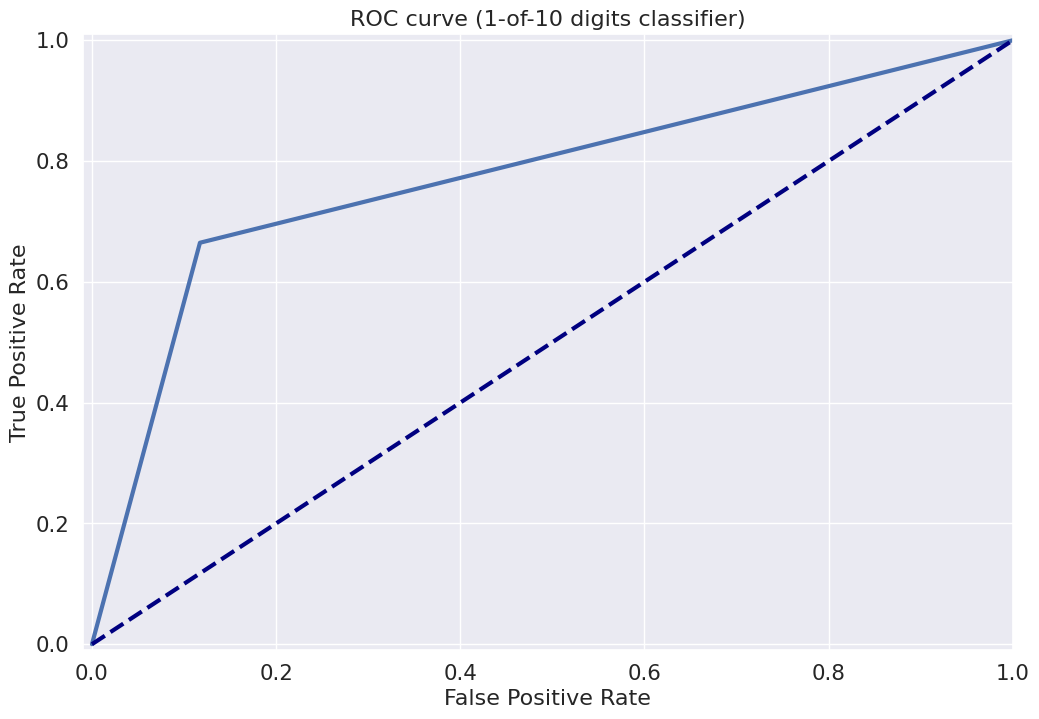

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_lr3, tpr_lr3, _ = roc_curve(y_test, y_pred)
roc_auc_lr3 = auc(fpr_lr3, tpr_lr3)

#plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr3, tpr_lr3, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr3))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
#plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
#plt.axes().set_aspect('equal')
plt.show()






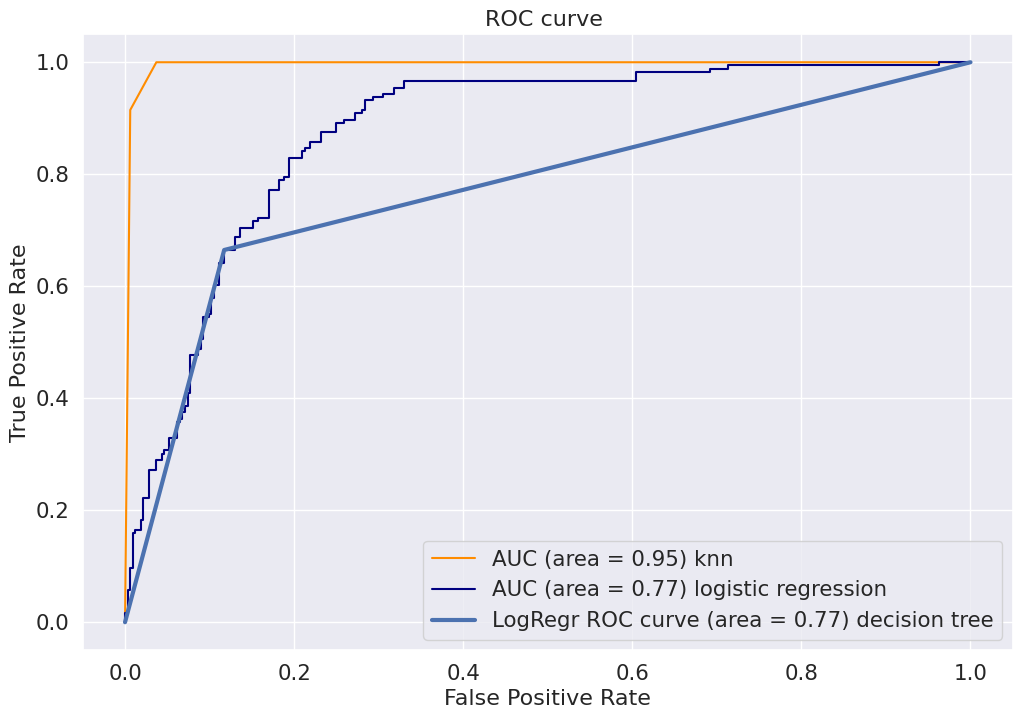

In [ ]:
plt.plot(fpr1, tpr1, color='darkorange',label='AUC (area = %0.2f) knn' % logit_roc_auc1)
plt.plot(fpr2, tpr2,color='navy', label='AUC (area = %0.2f) logistic regression' % logit_roc_auc2)
plt.plot(fpr_lr3, tpr_lr3, lw=3, label='LogRegr ROC curve (area = {:0.2f}) decision tree'.format(roc_auc_lr3))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve ', fontsize=16)
plt.legend()
plt.show()

# 5-SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)


2023/06/17 15:28:27 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3a8d3b9e05904957939846f53553c021', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/17 15:28:27 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


0.872

In [ ]:
svm_predicted = svm.predict(X_test)
accuracy_score(y_test, svm_predicted)

0.872

In [ ]:
param_grid = [
  {'C': [1, 10],'kernel': ['linear','rbf']}
 ]

SVM_model = SVC()

SVM_model = GridSearchCV(SVM_model,
                           param_grid,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)

SVM_model.fit(X_train, y_train)

2023/06/17 15:28:40 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e5b383a71f664191b2c3c918f3cb1ff9', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/17 15:28:40 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Fitting 10 folds for each of 4 candidates, totalling 40 fits


2023/06/17 15:36:22 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10], 'kernel': ['linear', 'rbf']}],
             verbose=2)

In [ ]:
print("Best Params: " + str(SVM_model.best_params_))


Best Params: {'C': 10, 'kernel': 'rbf'}


tuning svm

In [ ]:
svm = SVC(kernel='rbf', C=10).fit(X_train, y_train)
svm.score(X_test, y_test)

2023/06/17 15:36:51 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b2f2ae8ee3c54f9b97337f0f9b2f36da', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/17 15:36:51 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


0.886

In [ ]:
svm_predicted = svm.predict(X_test)
accuracy_score(y_test, svm_predicted)

0.886

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, svm_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, svm_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, svm_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, svm_predicted)))

Accuracy: 0.89
Precision: 0.82
Recall: 0.86
F1: 0.84


mlflow

In [ ]:
# enable autologging
mlflow.sklearn.autolog()

with mlflow.start_run() as run:
    SVM_model.fit(X_train, y_train)

# fetch logged data
params, metrics, tags, artifacts = fetch_logged_data(run.info.run_id)

2023/06/17 15:45:44 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Fitting 10 folds for each of 4 candidates, totalling 40 fits


2023/06/17 15:53:27 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


In [ ]:
params

{'refit': 'True',
 'cv': '10',
 'n_jobs': '-1',
 'pre_dispatch': '2*n_jobs',
 'verbose': '2',
 'estimator': 'SVC()',
 'param_grid': "[{'C': [1, 10], 'kernel': ['linear', 'rbf']}]",
 'best_C': '10',
 'best_kernel': 'rbf',
 'error_score': 'nan',
 'return_train_score': 'False',
 'scoring': 'None'}

In [ ]:
metrics

{'training_recall_score': 0.8766666666666667,
 'training_precision_score': 0.877870573870574,
 'training_score': 0.8766666666666667,
 'best_cv_score': 0.8726666666666667,
 'training_accuracy_score': 0.8766666666666667,
 'training_f1_score': 0.8771485496494023}

plot confusion matrix

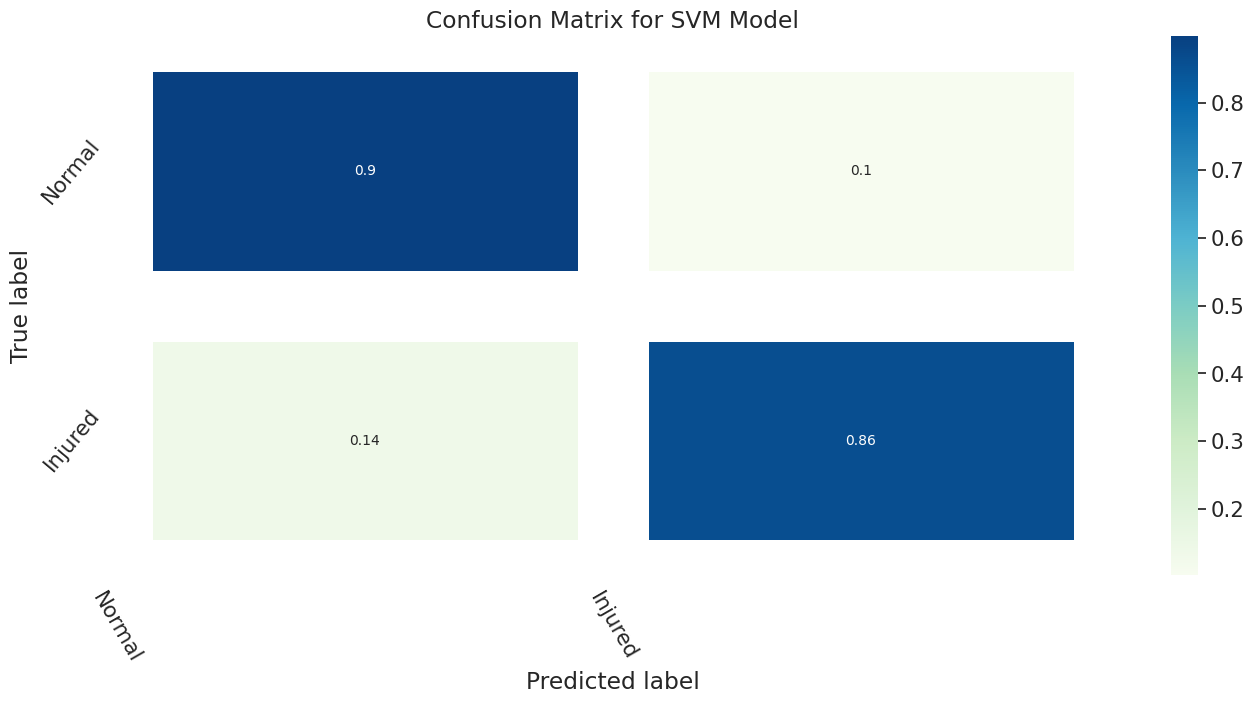

In [ ]:
matrix = confusion_matrix(y_test, svm_predicted)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.GnBu
            , linewidths=50)

# Add labels to the plot
class_names = ['Normal', 'Injured']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=300)
plt.yticks(tick_marks2, class_names, rotation=50)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVM Model')
plt.show()

# 6- Naive Bayes

Gaussian Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB


nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

2023/06/17 15:54:19 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '56d2e561e35d477d89d6634212a102f0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/17 15:54:19 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


GaussianNB()

In [ ]:
y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.822

In [ ]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

2023/06/17 15:54:29 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '939552f8be774d78b0689583ae383260', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/17 15:54:29 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'
2023/06/17 15:54:33 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'da62526632154191ae4d0335f6ea5105', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/17 15:54:33 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'
2023/06/17 15:54:37 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7a4ea1272c98463b9f796aab32bd2051', which will track hyperparamete

0.804

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.82
Precision: 0.75
Recall: 0.73
F1: 0.74


mlflow

In [ ]:
# enable autologging
mlflow.sklearn.autolog()

with mlflow.start_run() as run:
    nb_model.fit(X_train, y_train)

# fetch logged data
params, metrics, tags, artifacts = fetch_logged_data(run.info.run_id)

2023/06/17 15:55:24 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


In [ ]:
params

{'priors': 'None', 'var_smoothing': '1e-09'}

In [ ]:
metrics

{'training_recall_score': 0.8033333333333333,
 'training_log_loss': 0.504725198005009,
 'training_precision_score': 0.8040193846204393,
 'training_score': 0.8033333333333333,
 'training_accuracy_score': 0.8033333333333333,
 'training_roc_auc': 0.8755873761747524,
 'training_f1_score': 0.8036580203127757}

 Multinomial Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB


nb = MultinomialNB()
nb_model = nb.fit(X_train, y_train)
nb_model

2023/06/17 15:55:33 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1efde33243844f34b7832fd463d757c3', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/17 15:55:33 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


MultinomialNB()

In [ ]:
y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.78

In [ ]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

2023/06/17 15:55:42 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4d0167d1d1664305bab9678f1f7bba6a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/17 15:55:42 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'
2023/06/17 15:55:46 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6e01cfb59e694670be627f5fdded2d3d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/17 15:55:46 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'
2023/06/17 15:55:51 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c4b7f31c959b4b299dc28d30f3e4e308', which will track hyperparamete

0.776

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.78
Precision: 0.66
Recall: 0.77
F1: 0.71


mlflow

In [ ]:
# enable autologging
mlflow.sklearn.autolog()

with mlflow.start_run() as run:
    nb_model.fit(X_train, y_train)

# fetch logged data
params, metrics, tags, artifacts = fetch_logged_data(run.info.run_id)

2023/06/17 15:56:24 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


In [ ]:
params

{'alpha': '1.0',
 'force_alpha': 'warn',
 'fit_prior': 'True',
 'class_prior': 'None'}

In [ ]:
metrics

{'training_recall_score': 0.782,
 'training_log_loss': 1.7657709625973348,
 'training_precision_score': 0.7864921081704211,
 'training_score': 0.782,
 'training_accuracy_score': 0.782,
 'training_roc_auc': 0.7848456946913893,
 'training_f1_score': 0.783758617611725}

Bernoulli Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import BernoulliNB


nb = BernoulliNB()
nb_model = nb.fit(X_train, y_train)
nb_model

2023/06/17 15:56:33 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a9b747a28e7840529642a89c25d10a42', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/17 15:56:33 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


BernoulliNB()

In [ ]:
y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.648

In [ ]:
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.5f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.5f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.5f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.64800
Precision: 0.00000
Recall: 0.00000
F1: 0.00000


mlflow

In [ ]:
# enable autologging
mlflow.sklearn.autolog()

with mlflow.start_run() as run:
    nb_model.fit(X_train, y_train)

# fetch logged data
params, metrics, tags, artifacts = fetch_logged_data(run.info.run_id)

2023/06/17 15:56:37 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


In [ ]:
params

{'binarize': '0.0',
 'alpha': '1.0',
 'force_alpha': 'warn',
 'fit_prior': 'True',
 'class_prior': 'None'}

In [ ]:
metrics

{'training_recall_score': 0.6613333333333333,
 'training_log_loss': 0.6401467293911562,
 'training_precision_score': 0.4373617777777778,
 'training_score': 0.6613333333333333,
 'training_accuracy_score': 0.6613333333333333,
 'training_roc_auc': 0.5012819088138176,
 'training_f1_score': 0.5265189941144998}

# User Interface

In [ ]:
def outputt(inputt):

    new_df = pd.DataFrame([inputt])

# We predict the outcome
    new= rf_tuned_1.predict_proba(new_df)[:]
    prediction = rf_tuned_1.predict(new_df)

    Proba = int(((new[:,1])) * 100)
    return prediction.ravel()[0],Proba/100


In [ ]:
#! /usr/bin/env python

import sys


try:
    from Tkinter import *
except ImportError:
    from tkinter import *

try:
    import ttk
    py3 = 0
except ImportError:
    import tkinter.ttk as ttk
    py3 = 1


from PIL import Image, ImageTk
import threading


def vp_start_gui():
    '''Starting point when module is the main routine.'''
    global val, w, root
    root = Tk()
    top = New_Toplevel_1 (root)
    root.mainloop()

w = None
def create_New_Toplevel_1(root, *args, **kwargs):
    '''Starting point when module is imported by another program.'''
    global w, w_win, rt
    rt = root
    w = Toplevel (root)
    top = New_Toplevel_1 (w)
    return (w, top)

def destroy_New_Toplevel_1():
    global w
    w.destroy()
    w = None

class New_Toplevel_1:
    def __init__(self, top=None):
        '''This class configures and populates the toplevel window.
           top is the toplevel containing window.'''
        _bgcolor = 'steel blue'  # X11 color: 'gray85'
        _fgcolor = '#000000'  # X11 color: 'black'
        _compcolor = '#d9d9d9' # X11 color: 'gray85'
        _ana1color = '#d9d9d9' # X11 color: 'gray85'
        _ana2color = '#d9d9d9' # X11 color: 'gray85'
        font11 = "-family Arial -size 19 -weight normal -slant roman "  \
            "-underline 0 -overstrike 0"
        font12 = "-family Arial -size 12 -weight normal -slant roman "  \
            "-underline 0 -overstrike 0"
        font14 = "-family Arial -size 15 -weight normal -slant roman "  \
            "-underline 0 -overstrike 0"
        font15 = "-family Arial -size 12 -weight bold -slant roman "  \
            "-underline 0 -overstrike 0"
        self.style = ttk.Style()
        if sys.platform == "win32":
            self.style.theme_use('winnative')
        self.style.configure('.',background=_bgcolor)
        self.style.configure('.',foreground=_fgcolor)
        self.style.configure('.',font="TkDefaultFont")
        self.style.map('.',background=
            [('selected', _compcolor), ('active',_ana2color)])

        top.geometry("968x493+919+245")
        top.title("Diabetes Detection Fuzzy System")
        top.configure(background="#d9d9d9")
        top.configure(highlightbackground="#b9b9b9")
        top.configure(highlightcolor="black")

        self.TFrame1 = ttk.Frame(top)
        self.TFrame1.place(relx=0.01, rely=0.02, relheight=0.94, relwidth=0.48)
        self.TFrame1.configure(relief=GROOVE)
        self.TFrame1.configure(borderwidth="2")
        self.TFrame1.configure(relief=GROOVE)
        self.TFrame1.configure(width=465)

        self.TLabel1 = ttk.Label(self.TFrame1)
        self.TLabel1.place(relx=0.3, rely=0.04, height=32, width=350)
        self.TLabel1.configure(foreground="#000000")
        self.TLabel1.configure(font=font11)
        self.TLabel1.configure(relief=FLAT)
        self.TLabel1.configure(text='''Enter Patient's data ''')

#----------------------------pregnant times----------------------------------
        self.TLabel2 = ttk.Label(self.TFrame1)
        self.TLabel2.place(relx=0.02, rely=0.15, height=39, width=120)
        self.TLabel2.configure(foreground="#000000")
        self.TLabel2.configure(font=font12)
        self.TLabel2.configure(relief=FLAT)
        self.TLabel2.configure(text='''Pregnant Times''')

        self.TEntry_Preg = ttk.Entry(self.TFrame1)
        self.TEntry_Preg.place(relx=0.24, rely=0.17, relheight=0.05
                , relwidth=0.53)
        self.TEntry_Preg.configure(width=246)
        self.TEntry_Preg.configure(takefocus="")
        self.TEntry_Preg.configure(cursor="ibeam")

#-----------------------------------plas----------------------------------------
        self.TLabel3 = ttk.Label(self.TFrame1)
        self.TLabel3.place(relx=0.02, rely=0.24, height=39, width=120)
        self.TLabel3.configure(foreground="#000000")
        self.TLabel3.configure(font=font12)
        self.TLabel3.configure(relief=FLAT)
        self.TLabel3.configure(text='''Plasma Glucose Level''')

        self.TEntry_Plas = ttk.Entry(self.TFrame1)
        self.TEntry_Plas.place(relx=0.24, rely=0.26, relheight=0.05
                , relwidth=0.53)
        self.TEntry_Plas.configure(width=246)
        self.TEntry_Plas.configure(takefocus="")
        self.TEntry_Plas.configure(cursor="ibeam")

#---------------------------------Diastolic bp-------------------------------

        self.TLabel4 = ttk.Label(self.TFrame1)
        self.TLabel4.place(relx=0.02, rely=0.33, height=39, width=120)
        self.TLabel4.configure(foreground="#000000")
        self.TLabel4.configure(font=font12)
        self.TLabel4.configure(relief=FLAT)
        self.TLabel4.configure(text='''Diastolic BP''')

        self.TEntry_Dias = ttk.Entry(self.TFrame1)
        self.TEntry_Dias.place(relx=0.24, rely=0.35, relheight=0.05
                , relwidth=0.53)
        self.TEntry_Dias.configure(width=246)
        self.TEntry_Dias.configure(takefocus="")
        self.TEntry_Dias.configure(cursor="ibeam")

#----------------------------------------Tric----------------------------------

        self.TLabel5 = ttk.Label(self.TFrame1)
        self.TLabel5.place(relx=0.02, rely=0.41, height=39, width=120)
        self.TLabel5.configure(foreground="#000000")
        self.TLabel5.configure(font=font12)
        self.TLabel5.configure(relief=FLAT)
        self.TLabel5.configure(text='''Skin thickness''')

        self.TEntry_Tric = ttk.Entry(self.TFrame1)
        self.TEntry_Tric.place(relx=0.24, rely=0.43, relheight=0.05
                , relwidth=0.53)
        self.TEntry_Tric.configure(width=246)
        self.TEntry_Tric.configure(takefocus="")
        self.TEntry_Tric.configure(cursor="ibeam")

#-----------------------------Insulin-----------------------------------------

        self.TLabel6 = ttk.Label(self.TFrame1)
        self.TLabel6.place(relx=0.02, rely=0.5, height=39, width=120)
        self.TLabel6.configure(foreground="#000000")
        self.TLabel6.configure(font=font12)
        self.TLabel6.configure(relief=FLAT)
        self.TLabel6.configure(text='''Serum insulin''')

        self.TEntry_Ins = ttk.Entry(self.TFrame1)
        self.TEntry_Ins.place(relx=0.24, rely=0.52, relheight=0.05
                , relwidth=0.53)
        self.TEntry_Ins.configure(width=246)
        self.TEntry_Ins.configure(takefocus="")
        self.TEntry_Ins.configure(cursor="ibeam")

#-----------------------------BMI Value--------------------------------------

        self.TLabel6 = ttk.Label(self.TFrame1)
        self.TLabel6.place(relx=0.02, rely=0.61, height=39, width=120)
        self.TLabel6.configure(foreground="#000000")
        self.TLabel6.configure(font=font12)
        self.TLabel6.configure(relief=FLAT)
        self.TLabel6.configure(text='''BMI Value''')

        self.TEntry_bmi = ttk.Entry(self.TFrame1)
        self.TEntry_bmi.place(relx=0.24, rely=0.63, relheight=0.05
                , relwidth=0.53)
        self.TEntry_bmi.configure(width=246)
        self.TEntry_bmi.configure(takefocus="")
        self.TEntry_bmi.configure(cursor="ibeam")

#-----------------------------Pedigree------------------------------------

        self.TLabel6 = ttk.Label(self.TFrame1)
        self.TLabel6.place(relx=0.02, rely=0.70, height=39, width=120)
        self.TLabel6.configure(foreground="#000000")
        self.TLabel6.configure(font=font12)
        self.TLabel6.configure(relief=FLAT)
        self.TLabel6.configure(text='''Pedigree''')

        self.TEntry_Pedigree = ttk.Entry(self.TFrame1)
        self.TEntry_Pedigree.place(relx=0.24, rely=0.72, relheight=0.05
                              , relwidth=0.53)
        self.TEntry_Pedigree.configure(width=246)
        self.TEntry_Pedigree.configure(takefocus="")
        self.TEntry_Pedigree.configure(cursor="ibeam")

#-----------------------------Age-----------------------------------------

        self.TLabel6 = ttk.Label(self.TFrame1)
        self.TLabel6.place(relx=0.02, rely=0.79, height=39, width=120)
        self.TLabel6.configure(foreground="#000000")
        self.TLabel6.configure(font=font12)
        self.TLabel6.configure(relief=FLAT)
        self.TLabel6.configure(text='''Age''')

        self.TEntry_Age = ttk.Entry(self.TFrame1)
        self.TEntry_Age.place(relx=0.24, rely=0.81, relheight=0.05
                              , relwidth=0.53)
        self.TEntry_Age.configure(width=246)
        self.TEntry_Age.configure(takefocus="")
        self.TEntry_Age.configure(cursor="ibeam")
# -----------------------------------------------------------------------

        self.TButton_eval = ttk.Button(self.TFrame1)
        self.TButton_eval.place(relx=0.34, rely=0.93, height=35, width=126)
        self.TButton_eval.configure(takefocus="")
        self.TButton_eval.configure(text='''Evaluate''')
        self.TButton_eval.bind('<Button-1>',lambda e:main_support.TButton_eval_onClick(e))


        self.TLabel_Indicator = ttk.Label(self.TFrame1)
        self.TLabel_Indicator.place(relx=0.29, rely=0.88, height=19, width=184)
        self.TLabel_Indicator.configure(foreground="#000000")
        self.TLabel_Indicator.configure(relief=FLAT)
        self.TLabel_Indicator.configure(anchor=CENTER)

        self.TLabel7 = ttk.Label(self.TFrame1)
        self.TLabel7.place(relx=0.8, rely=0.18, height=19, width=36)
        self.TLabel7.configure(foreground="#000000")
        self.TLabel7.configure(font=font15)
        self.TLabel7.configure(relief=FLAT)
        self.TLabel7.configure(anchor=W)
        self.TLabel7.configure(text='''0-17''')
        self.TLabel7.configure(width=36)

        self.TLabel8 = ttk.Label(self.TFrame1)
        self.TLabel8.place(relx=0.8, rely=0.26, height=19, width=46)
        self.TLabel8.configure(foreground="#000000")
        self.TLabel8.configure(font=font15)
        self.TLabel8.configure(relief=FLAT)
        self.TLabel8.configure(anchor=W)
        self.TLabel8.configure(text='''0-199''')
        self.TLabel8.configure(width=46)

        self.TLabel9 = ttk.Label(self.TFrame1)
        self.TLabel9.place(relx=0.8, rely=0.35, height=19, width=66)
        self.TLabel9.configure(foreground="#000000")
        self.TLabel9.configure(font=font15)
        self.TLabel9.configure(relief=FLAT)
        self.TLabel9.configure(anchor=W)
        self.TLabel9.configure(text='''0-122''')
        self.TLabel9.configure(width=66)

        self.TLabel11 = ttk.Label(self.TFrame1)
        self.TLabel11.place(relx=0.8, rely=0.43, height=19, width=76)
        self.TLabel11.configure(foreground="#000000")
        self.TLabel11.configure(font=font15)
        self.TLabel11.configure(relief=FLAT)
        self.TLabel11.configure(anchor=W)
        self.TLabel11.configure(text='''0 - 99''')
        self.TLabel11.configure(width=76)

        self.TLabel10 = ttk.Label(self.TFrame1)
        self.TLabel10.place(relx=0.8, rely=0.52, height=19, width=56)
        self.TLabel10.configure(foreground="#000000")
        self.TLabel10.configure(font=font15)
        self.TLabel10.configure(relief=FLAT)
        self.TLabel10.configure(anchor=W)
        self.TLabel10.configure(text='''0-846''')
        self.TLabel10.configure(width=56)

        self.TLabel10 = ttk.Label(self.TFrame1)
        self.TLabel10.place(relx=0.8, rely=0.63, height=19, width=56)
        self.TLabel10.configure(foreground="#000000")
        self.TLabel10.configure(font=font15)
        self.TLabel10.configure(relief=FLAT)
        self.TLabel10.configure(anchor=W)
        self.TLabel10.configure(text='''0-67''')
        self.TLabel10.configure(width=56)

        self.TLabel10 = ttk.Label(self.TFrame1)
        self.TLabel10.place(relx=0.8, rely=0.72, height=19, width=56)
        self.TLabel10.configure(foreground="#000000")
        self.TLabel10.configure(font=font15)
        self.TLabel10.configure(relief=FLAT)
        self.TLabel10.configure(anchor=W)
        self.TLabel10.configure(text='''0-2.42''')
        self.TLabel10.configure(width=56)


        self.TLabel10 = ttk.Label(self.TFrame1)
        self.TLabel10.place(relx=0.8, rely=0.82, height=19, width=56)
        self.TLabel10.configure(foreground="#000000")
        self.TLabel10.configure(font=font15)
        self.TLabel10.configure(relief=FLAT)
        self.TLabel10.configure(anchor=W)
        self.TLabel10.configure(text='''21-81''')
        self.TLabel10.configure(width=56)

        self.TLabel_Output = ttk.Label(top)
        self.TLabel_Output.place(relx=0.52, rely=0.06, height=29, width=436)
        self.TLabel_Output.configure(foreground="#000000")
        self.TLabel_Output.configure(font=font11)
        self.TLabel_Output.configure(relief=FLAT)
        self.TLabel_Output.configure(anchor=CENTER)
        self.TLabel_Output.configure(text='''Diabetes Stage :''')
        self.TLabel_Output.configure(width=436)

        self.Canvas_Graph = Canvas(top)
        self.Canvas_Graph.place(relx=0.51, rely=0.16, relheight=0.66
                , relwidth=0.47)
        self.Canvas_Graph.configure(background="white")
        self.Canvas_Graph.configure(borderwidth="2")
        self.Canvas_Graph.configure(highlightbackground="#e0ded1")
        self.Canvas_Graph.configure(highlightcolor="black")
        self.Canvas_Graph.configure(insertbackground="black")
        self.Canvas_Graph.configure(relief=RIDGE)
        self.Canvas_Graph.configure(selectbackground="#cac8bc")
        self.Canvas_Graph.configure(selectforeground="black")
        self.Canvas_Graph.configure(width=456)

        self.TLabel_OutputText = ttk.Label(top)
        self.TLabel_OutputText.place(relx=0.52, rely=0.87, height=29, width=500)
        self.TLabel_OutputText.configure(foreground="#000000")
        self.TLabel_OutputText.configure(font=font14)
        self.TLabel_OutputText.configure(relief=FLAT)
        self.TLabel_OutputText.configure(anchor=CENTER)
        self.TLabel_OutputText.configure(width=500)

        widgets = [self.TEntry_Preg, self.TEntry_Plas, self.TEntry_Dias, self.TEntry_Tric, self.TEntry_Ins, self.TEntry_bmi,self.TEntry_Pedigree,self.TEntry_Age]
        self.TButton_eval.bind('<Button-1>',lambda e:self.TButton_eval_onClick(e, widgets))

        self.TEntry_Preg.insert(END, '7')
        self.TEntry_Plas.insert(END, '140')
        self.TEntry_Dias.insert(END, '80')
        self.TEntry_Tric.insert(END, '50')
        self.TEntry_Ins.insert(END, '500')
        self.TEntry_bmi.insert(END, '40')
        self.TEntry_Pedigree.insert(END, '1.40')
        self.TEntry_Age.insert(END, '50')

        self.tk_img = ImageTk.PhotoImage(file='ss.jpg')

        self.Canvas_Graph.create_image(350, 250, image=self.tk_img)




    def TButton_eval_onClick(self, p1, widgets):

        self.TLabel_Indicator['text'] = "Processing "
        self.TButton_eval.state(['disabled'])

        # run in multithread so our UI won't freeze
        args = [float(x.get()) for x in widgets]
        t = threading.Thread(target=self.doMATLABProcessing, args=[args])
        t.daemon = True
        t.start()

    def doMATLABProcessing(self, data):


        val,prop=outputt(data)
        print(val)

        self.TLabel_Output['text'] = "Output : %.2f" % prop
        self.TLabel_Indicator['text'] = "Done!"
        self.outputOutputMsg(prop)

        # enable the button back
        self.TButton_eval.state(['!disabled'])

    def outputOutputMsg(self, val):
        cond = []
        if val >= 0.1 and val <= 0.9: cond += ['medium']
        if val >= 0 and val <= 0.4: cond += ['safe']
        if val >= 0.6 and val <= 1.0: cond += ['dangerous']
        if len(cond) == 1:
            if val <= 0.1:
                self.TLabel_OutputText['text'] = "You're in Safe stage of Diabetes.".format(*cond)
            if val >= 0.4 and val <= 0.6:
                self.TLabel_OutputText['text'] = "You're in Medium stage of Diabetes.".format(*cond)
            if val >= 0.7:
                self.TLabel_OutputText['text'] = "You're in Dangerous stage of Diabetes.".format(*cond)

        else:
            if val >= 0.1 and val <= 0.4:
                self.TLabel_OutputText['text'] = "You're in Medium and Safe stage of Diabetes.".format(*cond)
            if val >= 0.6 and val <= 0.7:
                self.TLabel_OutputText['text'] = "You're in Medium and  Dangerous stage of Diabetes.".format(*cond)


if __name__ == '__main__':
    vp_start_gui()



